# Plots of Activation Functions in Neural Networks

In [1]:
#############################################
## Imports:
#############################################

import numpy as np

import os
import glob
import uproot
import pandas as pd

import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter, NullLocator, FixedLocator, MultipleLocator
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
#############################################
## Function Definitions:
#############################################

## Linear / Identity
def linear(x):
    return x

## ReLU (Rectified Linear Unit)
def relu(x):
    return np.maximum(x, 0)

## Sigmoid / Logistic / Soft Step
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Hard Sigmoid
def hardsigmoid(x):
    cons  = [x < -2.5,(x >= -2.5) & (x <= 2.5) , x > 2.5]
    funcs = [lambda x: 0, lambda x: 0.2 * x + 0.5, lambda x: 1]
    return np.piecewise(x, cons, funcs)

## Softplus / SmoothReLU
def softplus(x):
    return np.log(1+ np.exp(x))

## Leaky ReLU / Parametric ReLU
def leaky_relu(x, a = 0.01):
    #return np.maximum(x, a*x)
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: a*x, lambda x: x])

## ThresholdedReLU
def thresholdedrelu(x, theta = 1.0):
    return np.piecewise(x, [x < theta, x >= theta], [lambda x: 0, lambda x: x])

## ELU (Exponential Linear Unit)
def elu(x, a = 1.0):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: a*(np.exp(x)-1), lambda x: x])

## SELU (Scaled Exponential Linear Unit)
def selu(x, a = 1.0, b = 0.5):
    return b * elu(x, a)

## Hyperbolic Tangent
def tanh(x):
    return np.tanh(x)

## Softsign
def softsign(x):
    return x / (np.abs(x) + 1)

## Exponential
def exponential(x):
    return np.exp(x)

## Softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

## Binary Step
def step(x):
    return np.heaviside(x, 1)

## Arctangent
def arctan(x):
    return np.arctan(x)

## Swish
def swish(x):
    return x / (1 + np.exp(-x))

In [3]:
x_list = np.linspace(-10, 10, 401)

## Individual Plots

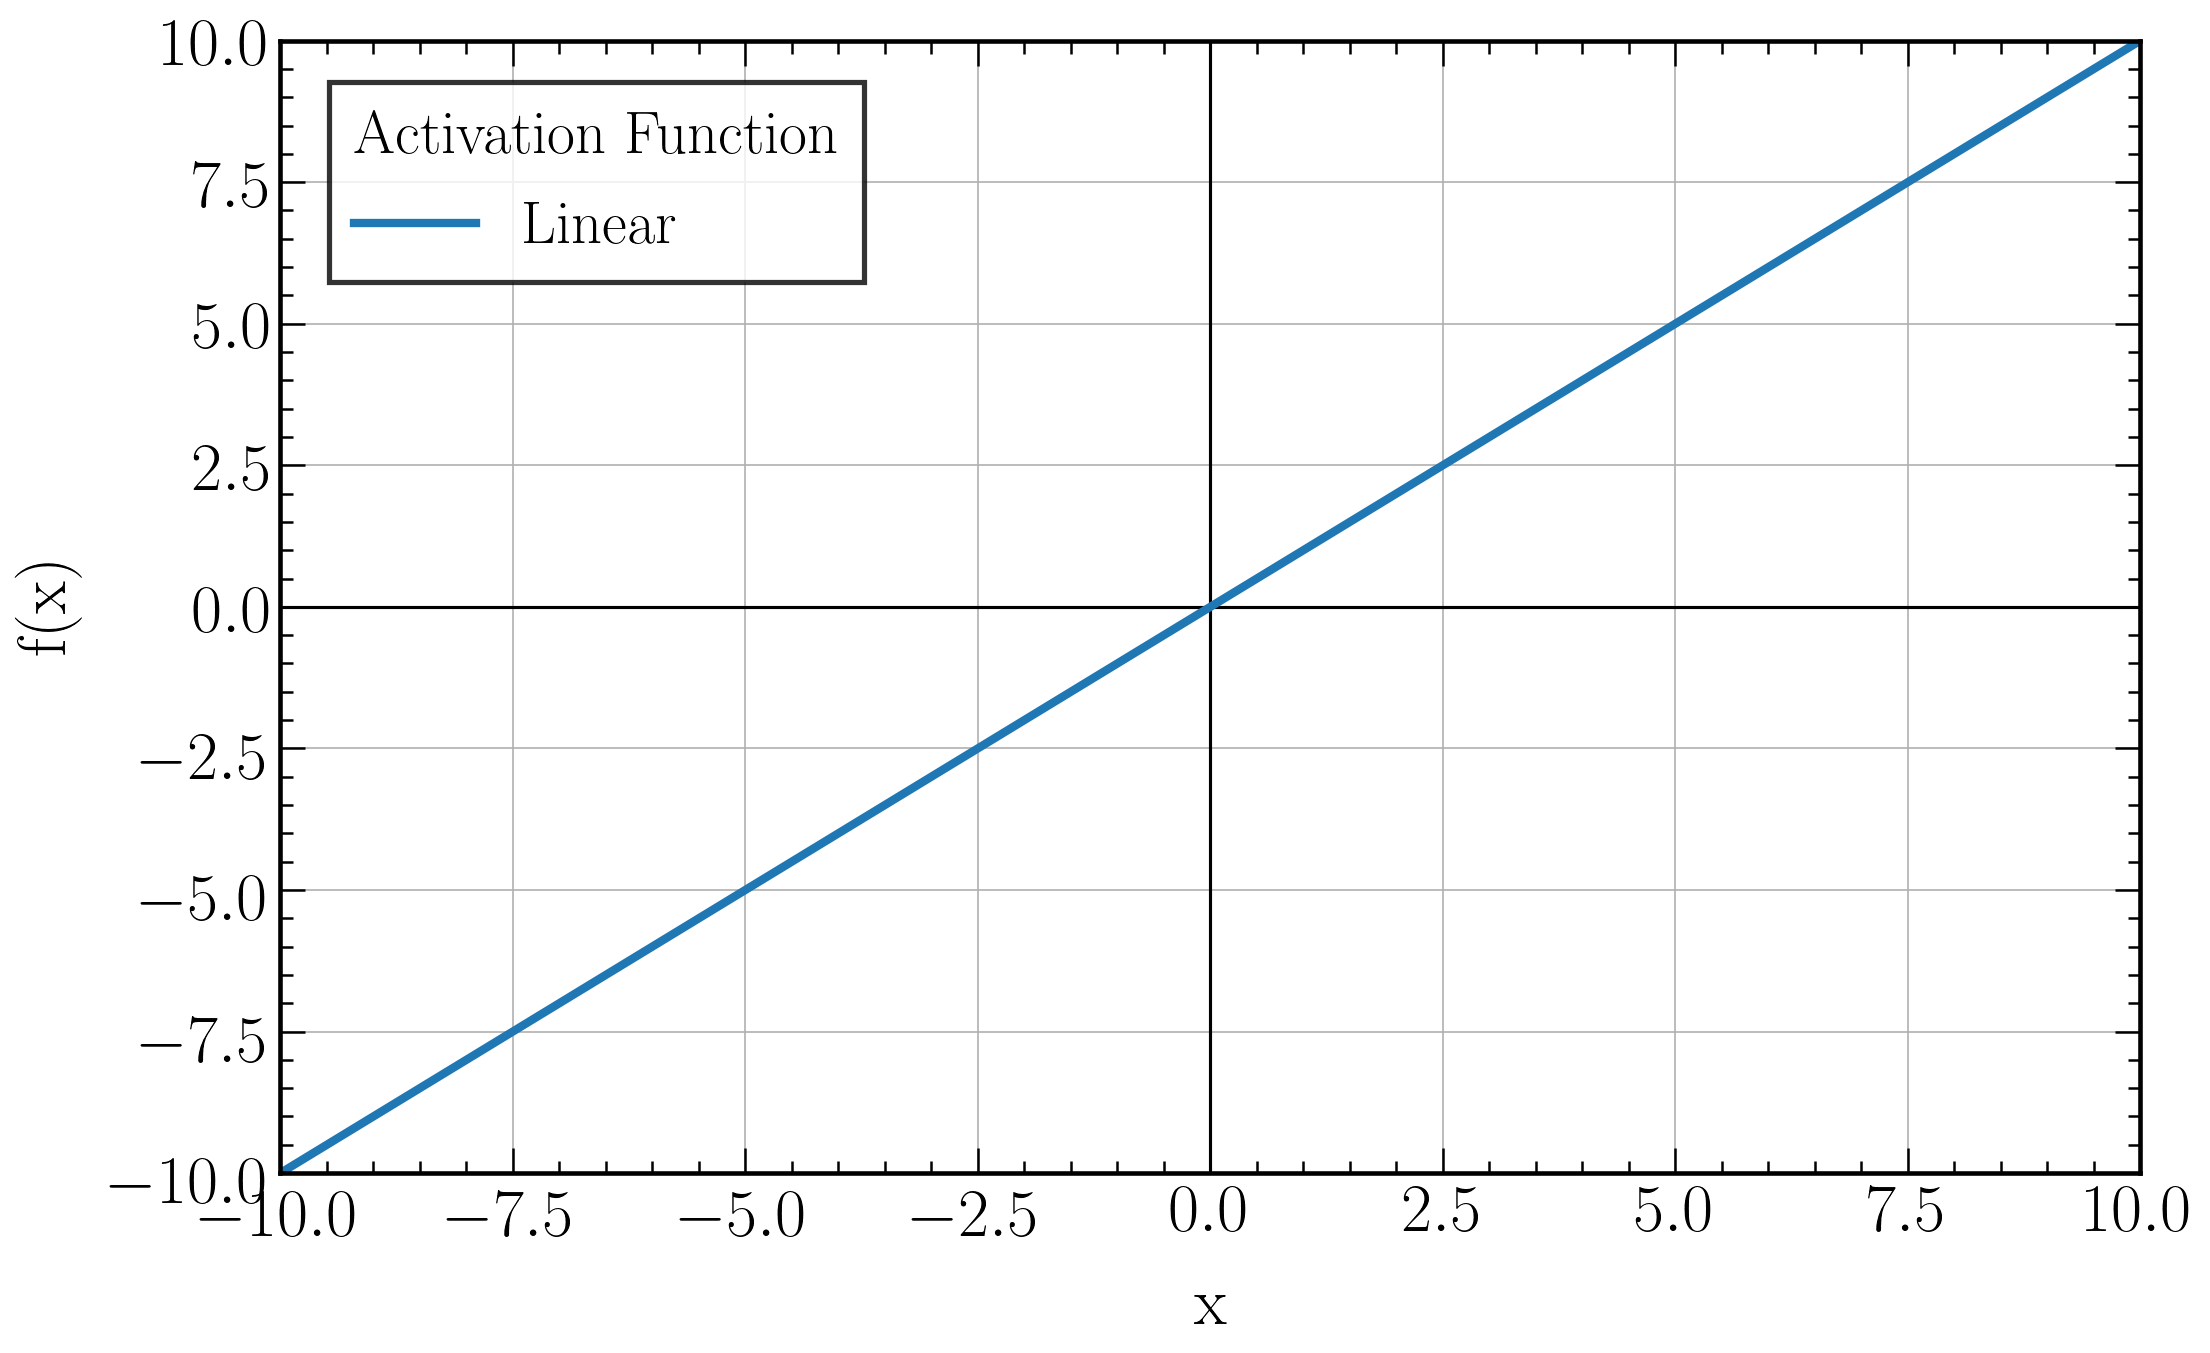

In [4]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, linear(x_list), label = 'Linear', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Linear.png")
plt.show()

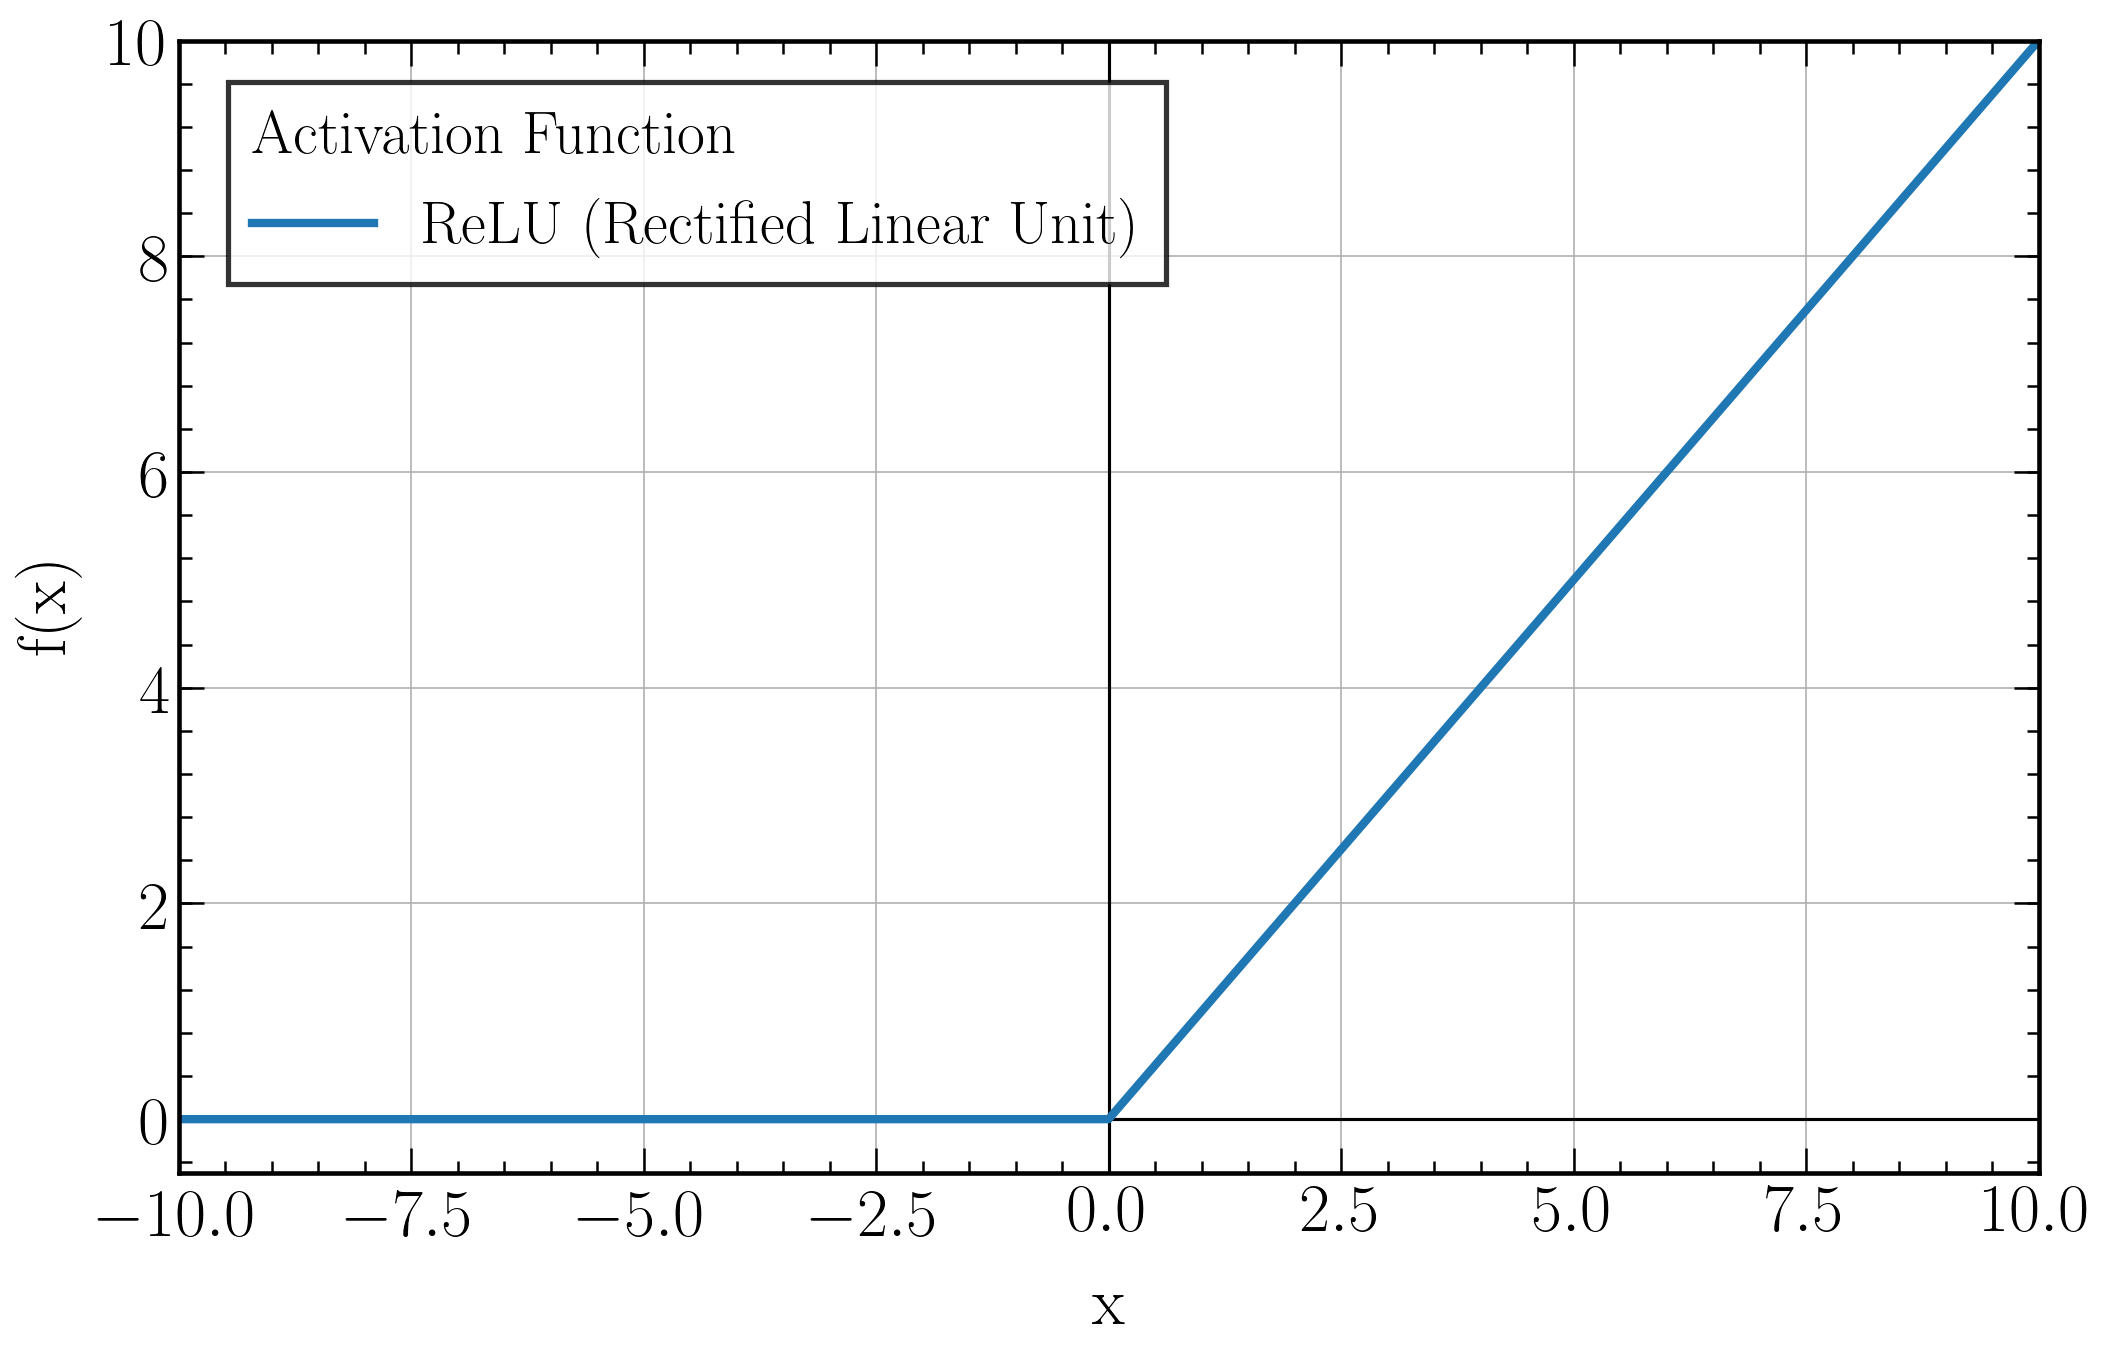

In [5]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, relu(x_list), label = 'ReLU (Rectified Linear Unit)', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ReLU.png")
plt.show()

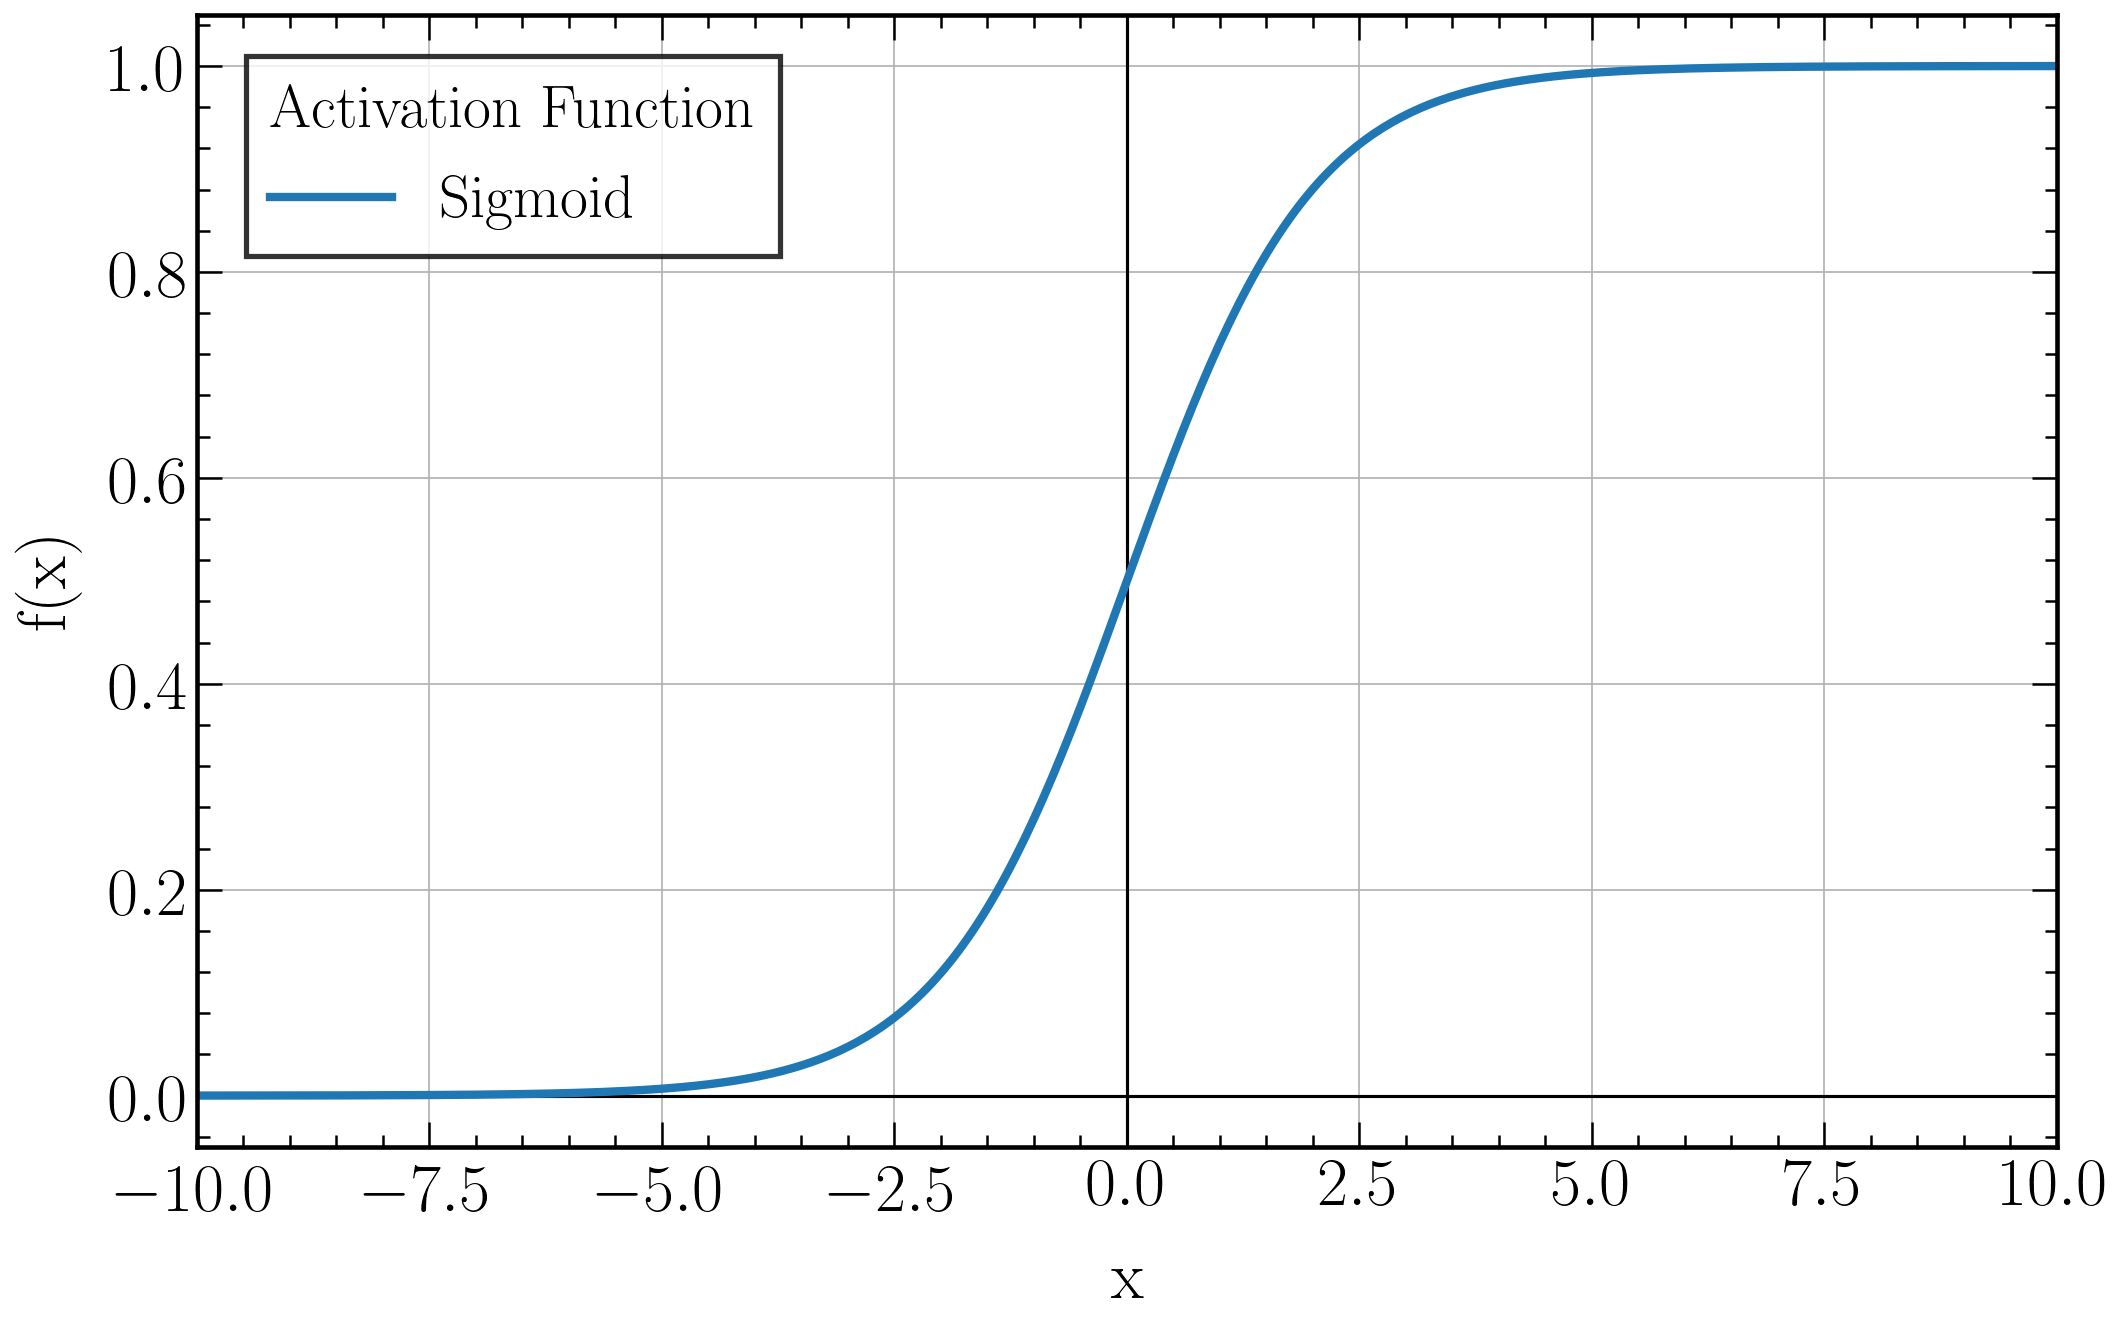

In [6]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, sigmoid(x_list), label = 'Sigmoid', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Sigmoid.png")
plt.show()

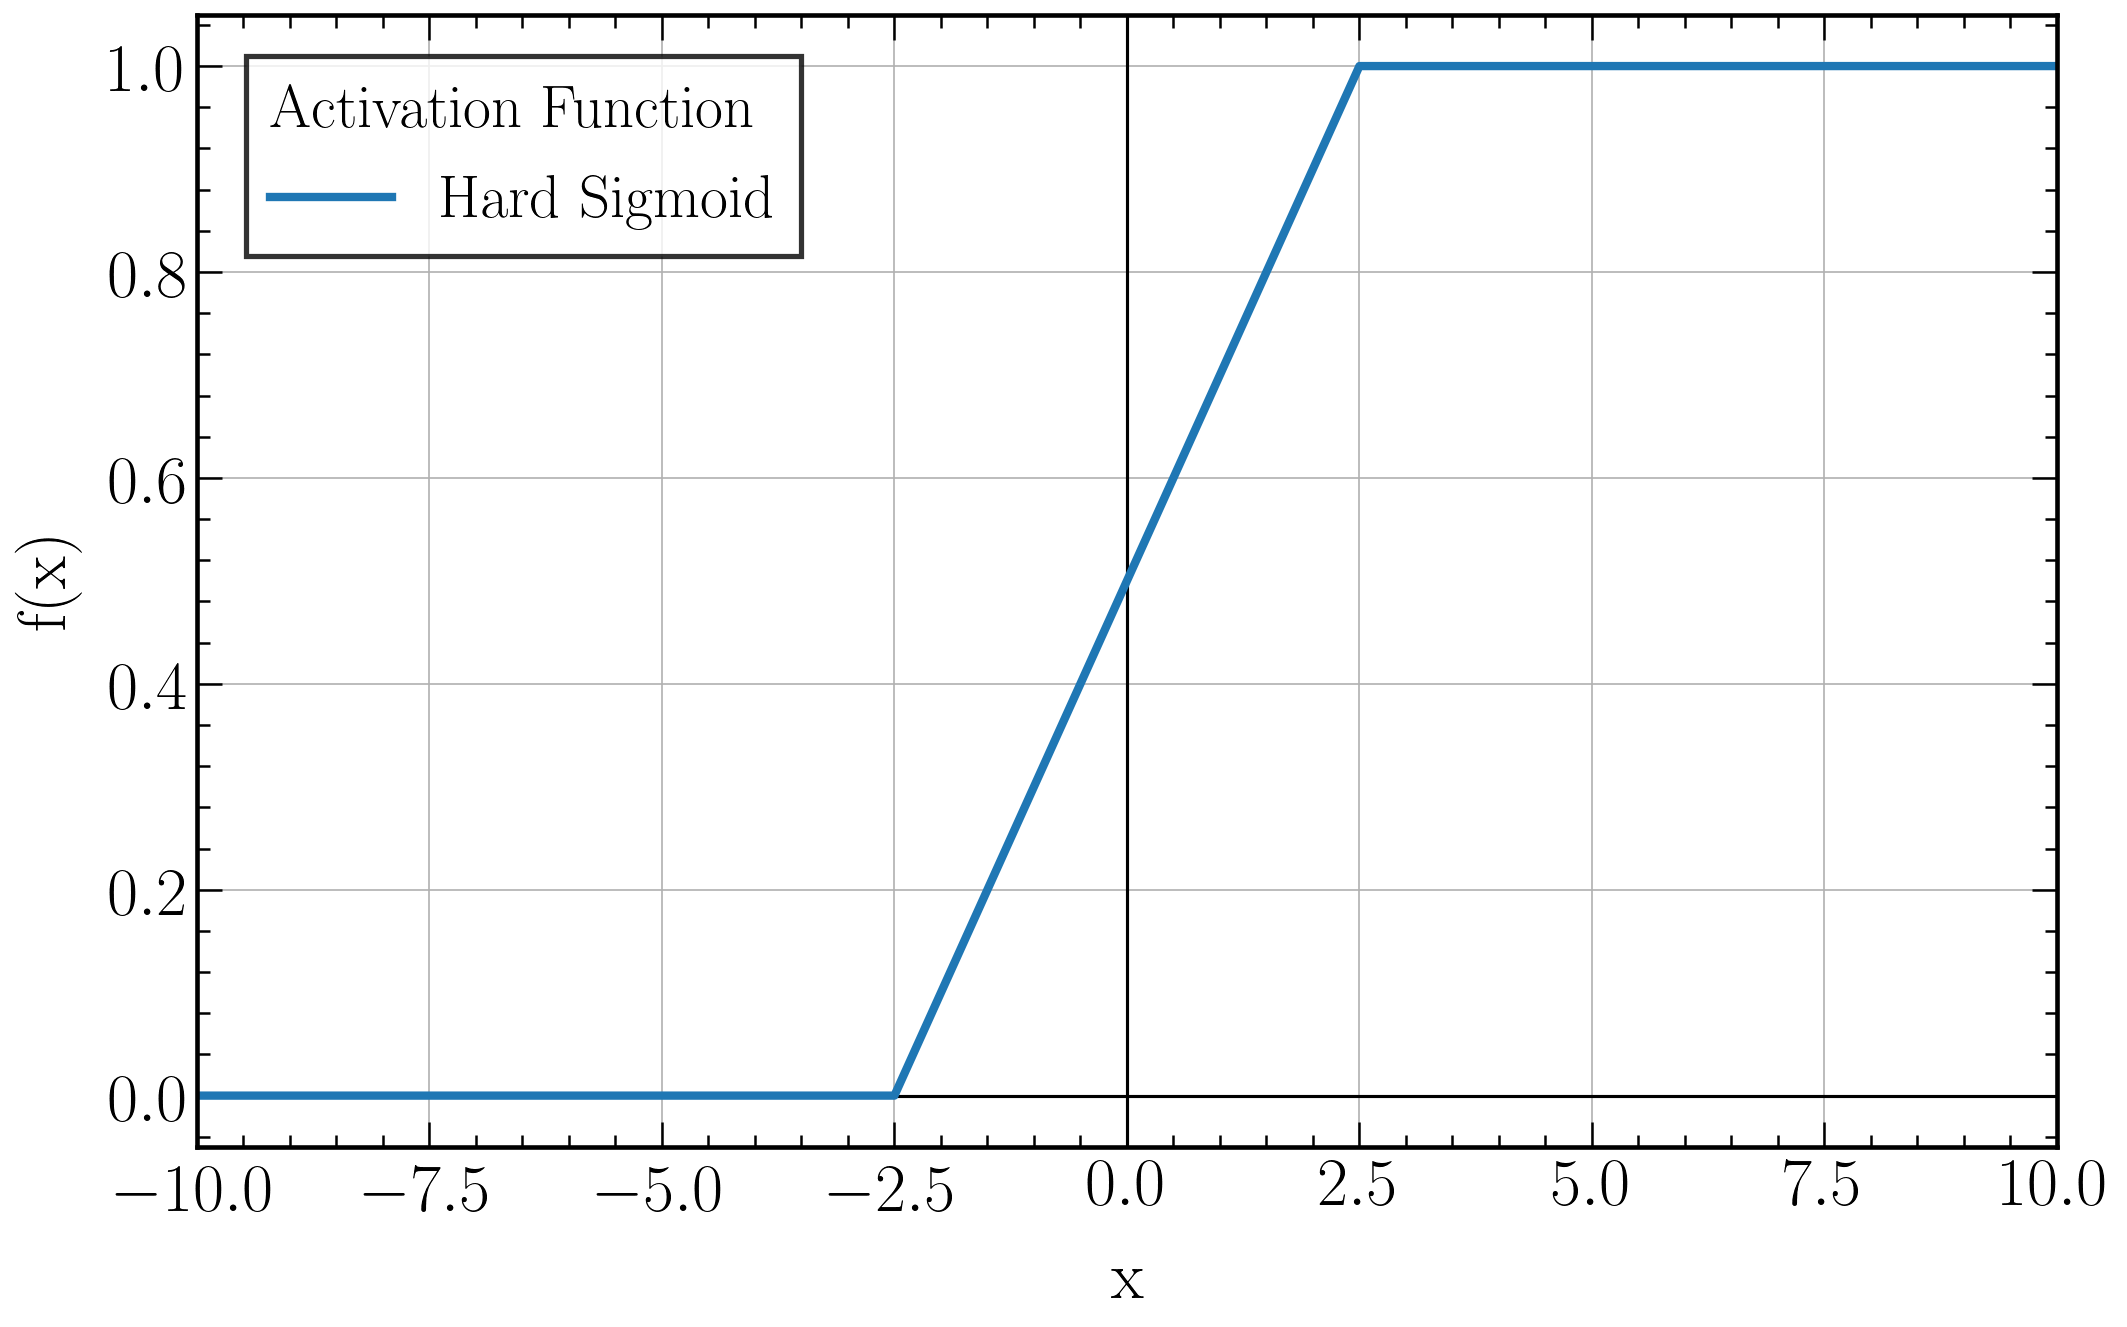

In [7]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, hardsigmoid(x_list), label = 'Hard Sigmoid', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_HardSigmoid.png")
plt.show()

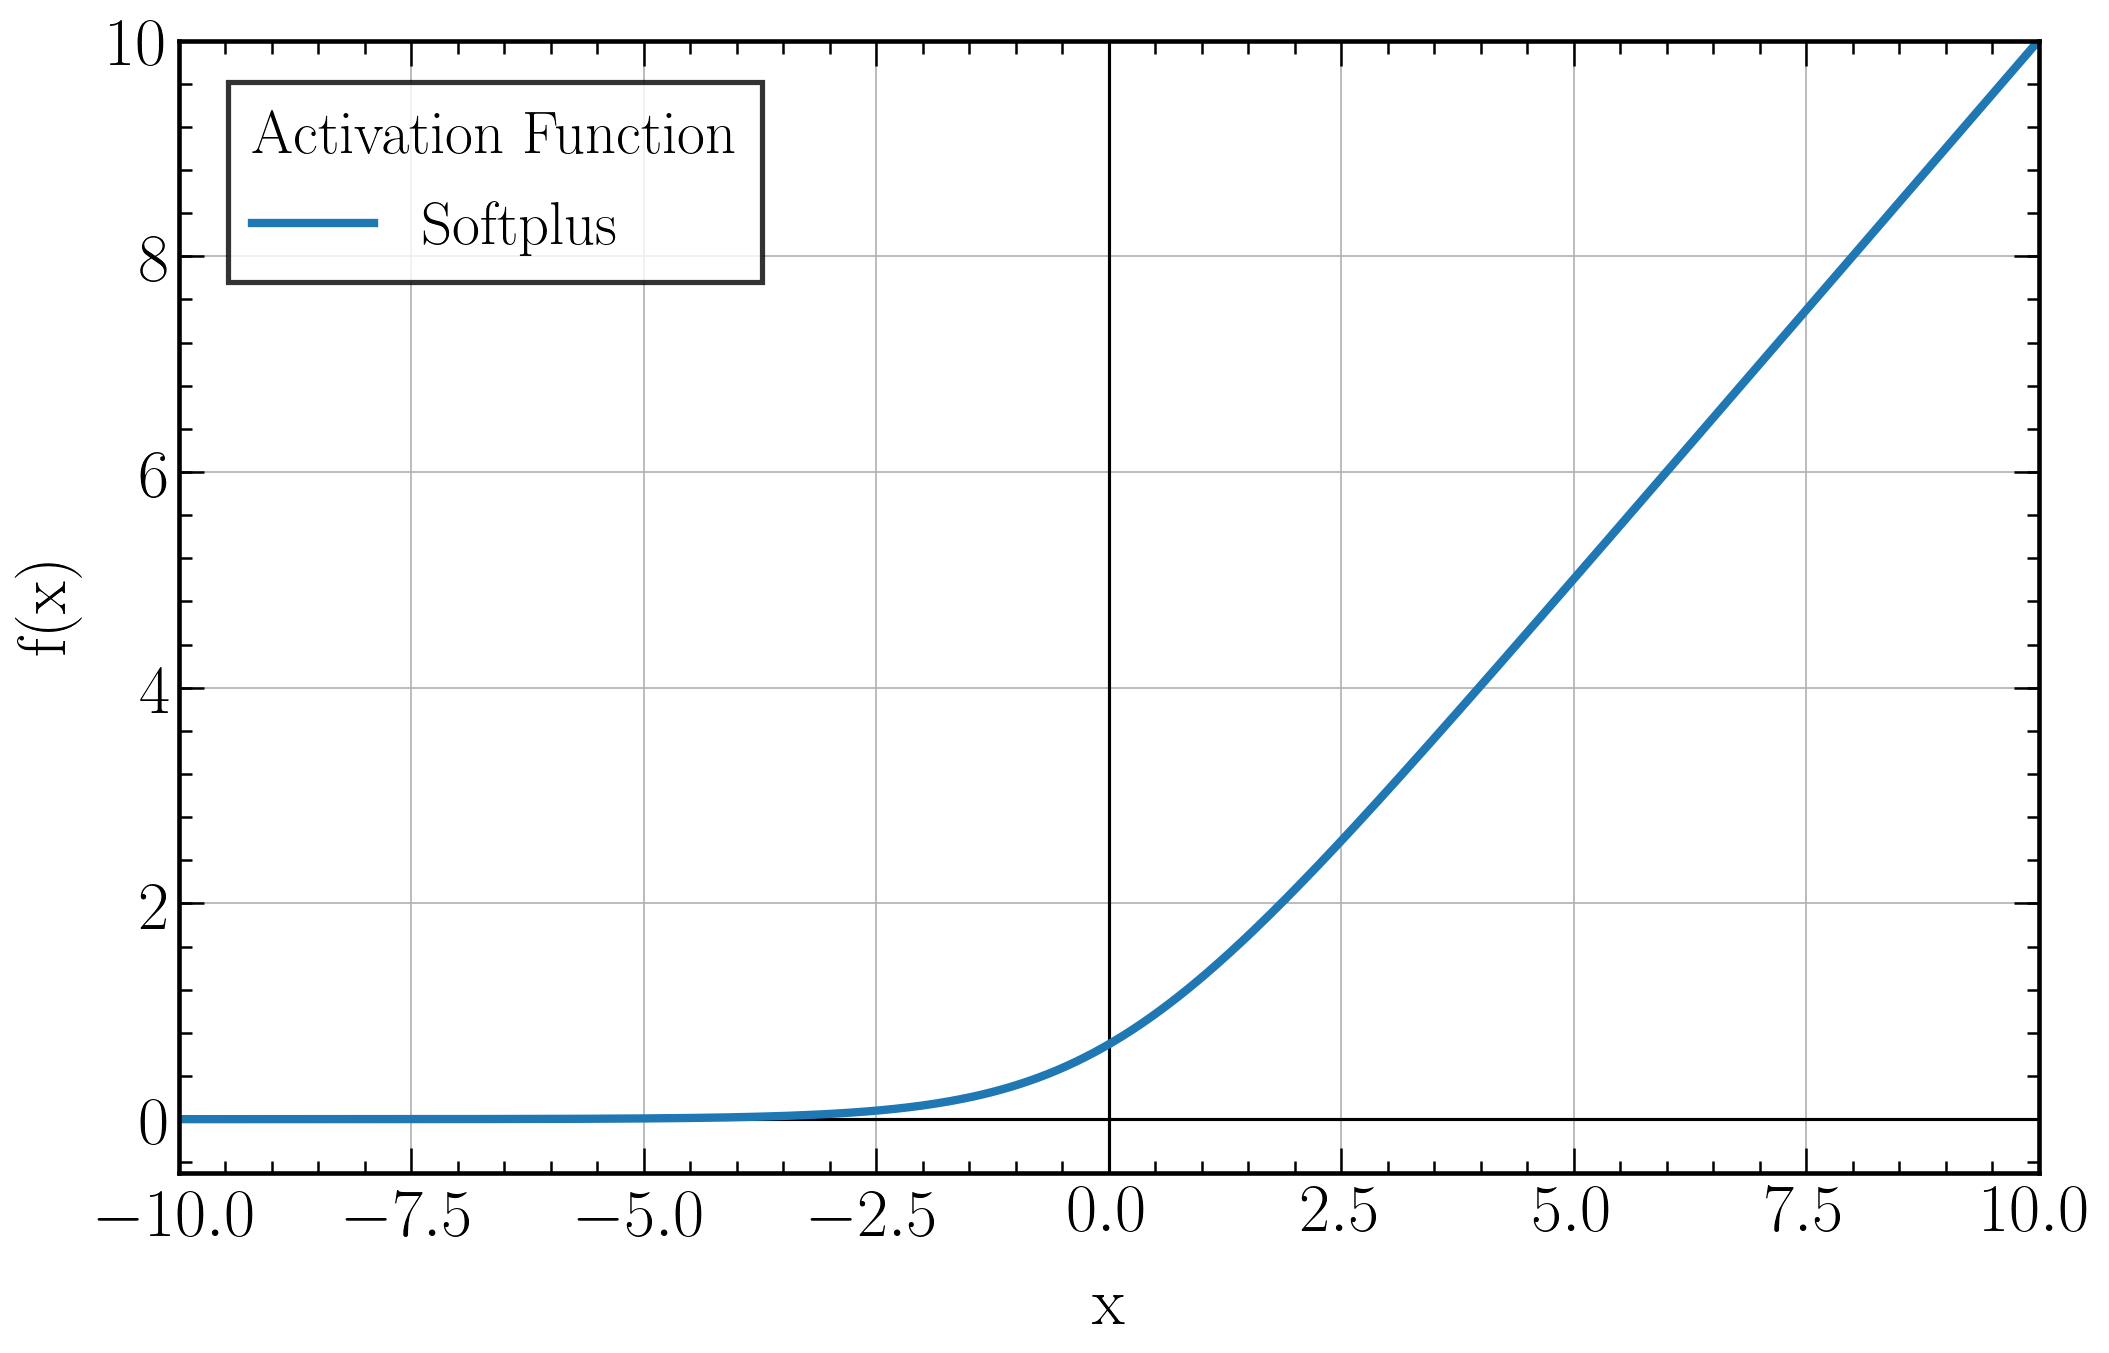

In [8]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, softplus(x_list), label = 'Softplus', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Softplus.png")
plt.show()

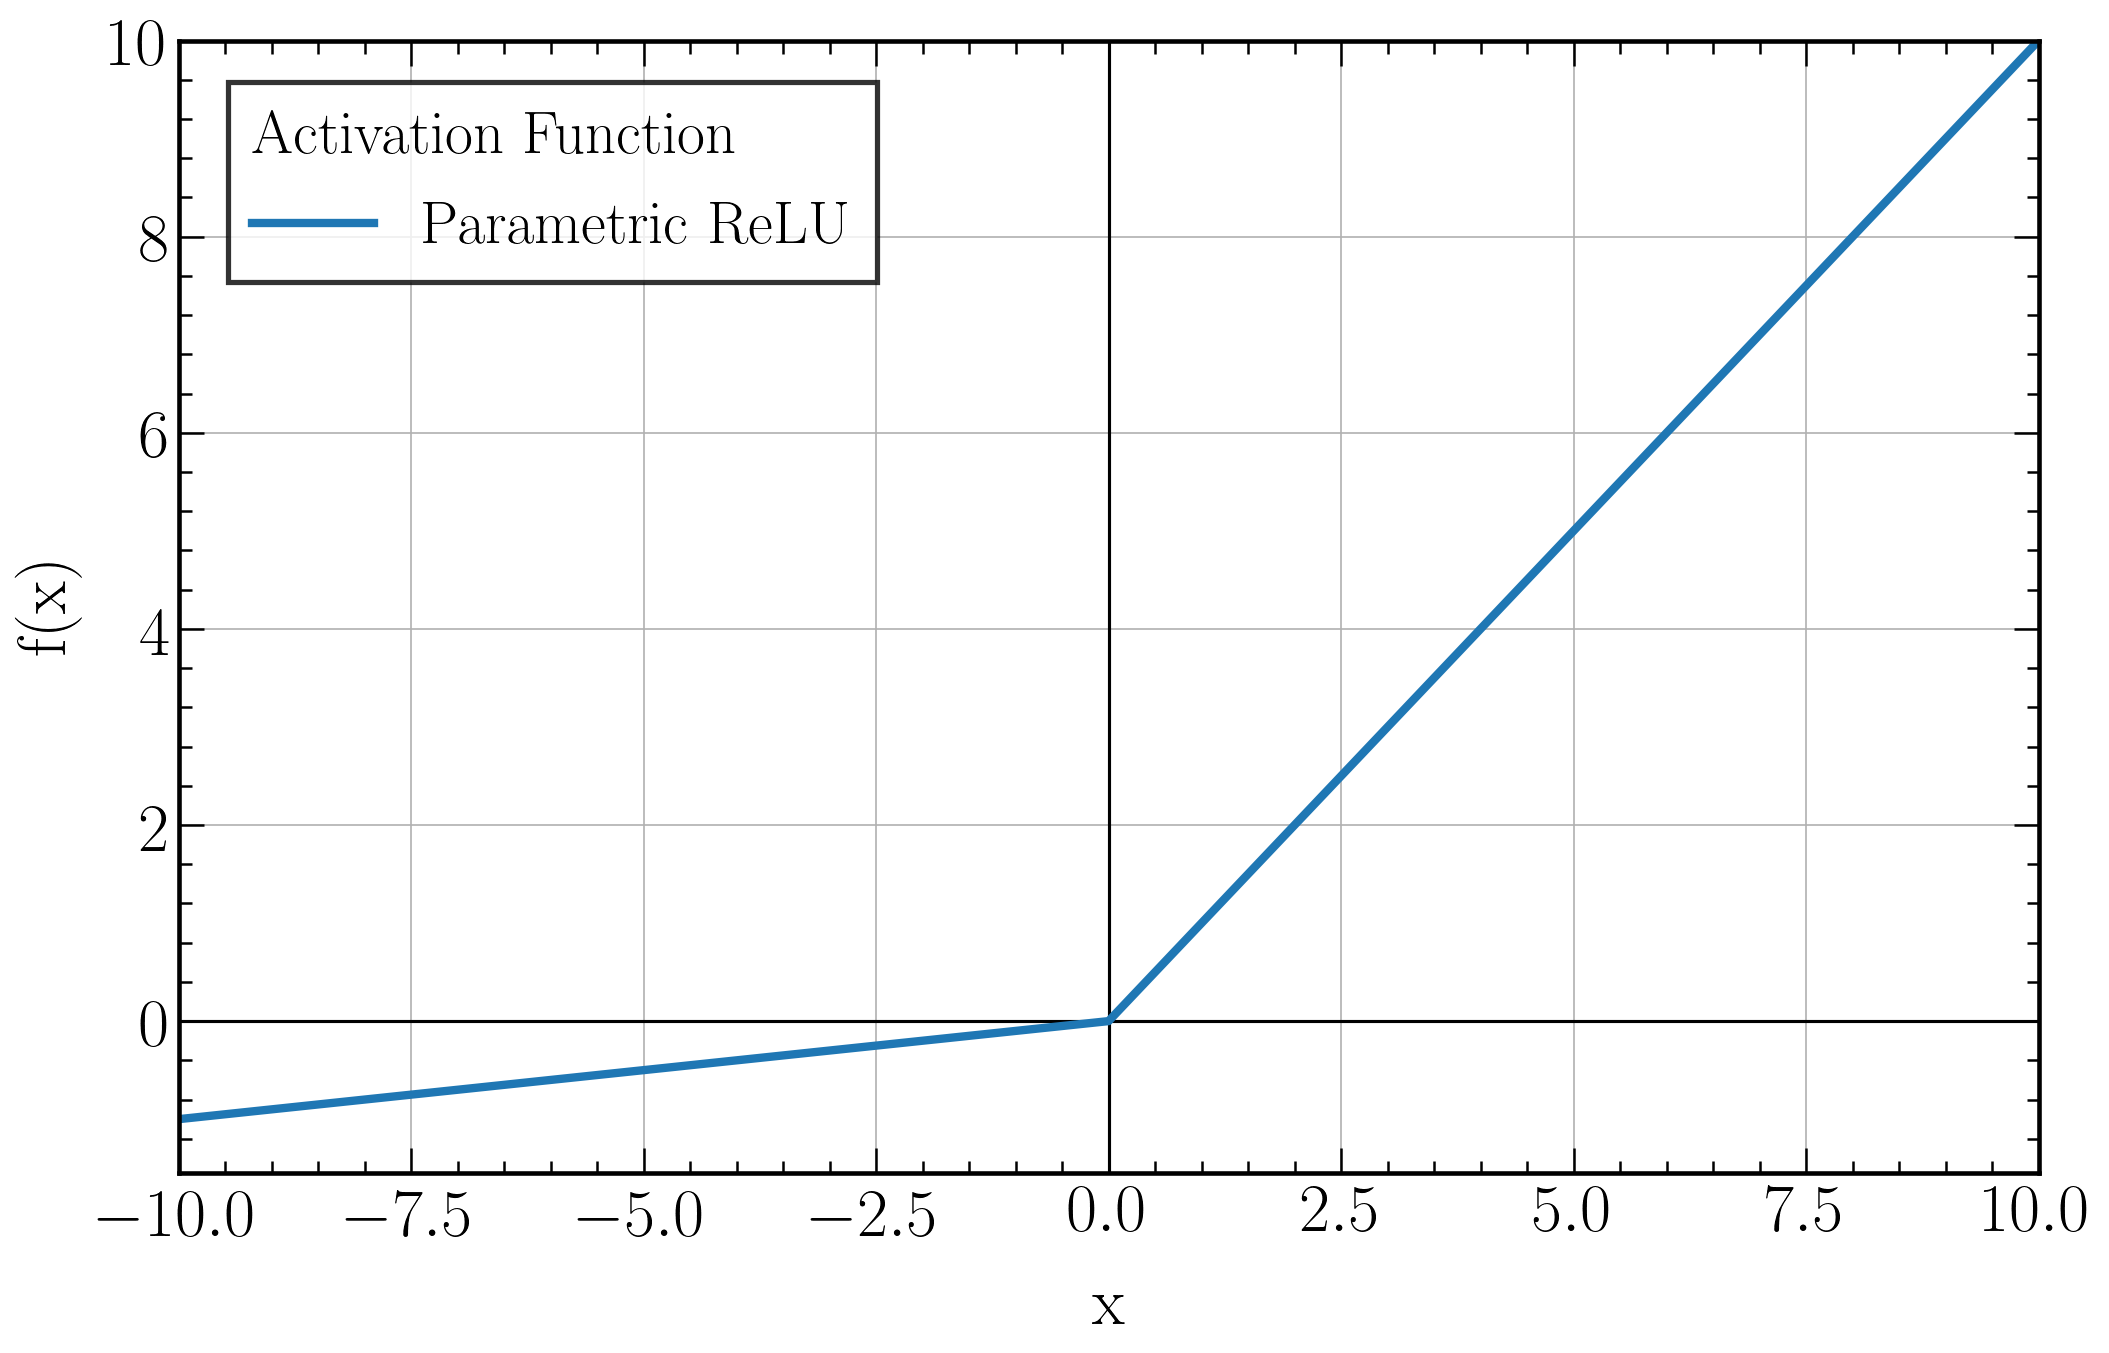

In [9]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, leaky_relu(x_list, 0.1), label = 'Parametric ReLU', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ParametricReLU.png")
plt.show()

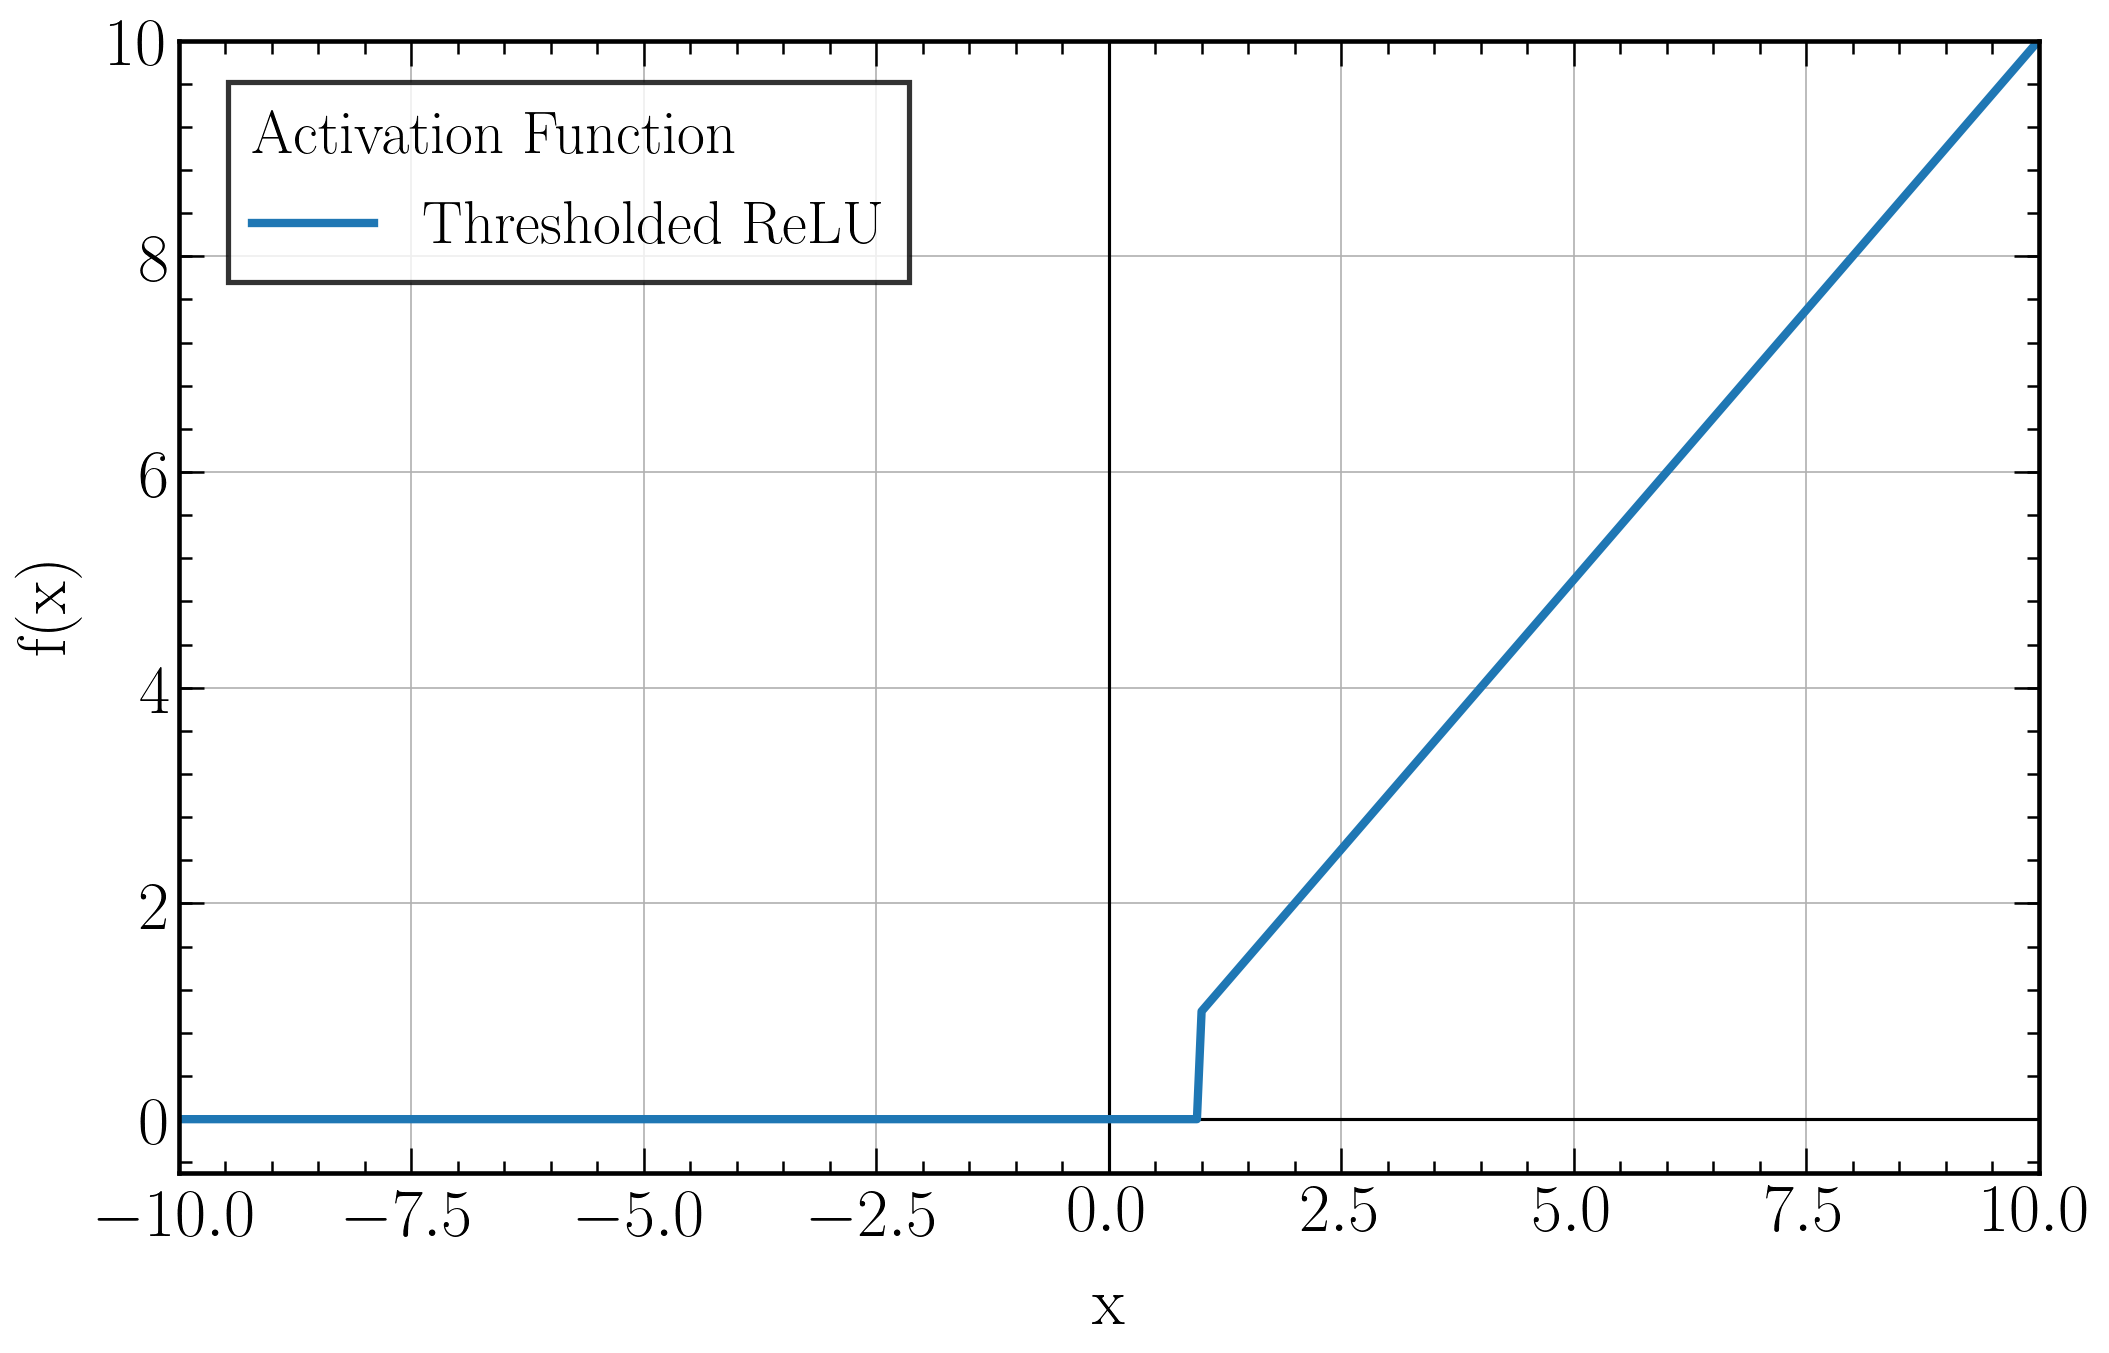

In [10]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, thresholdedrelu(x_list, 1.0), label = 'Thresholded ReLU', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ThresholdedReLU.png")
plt.show()

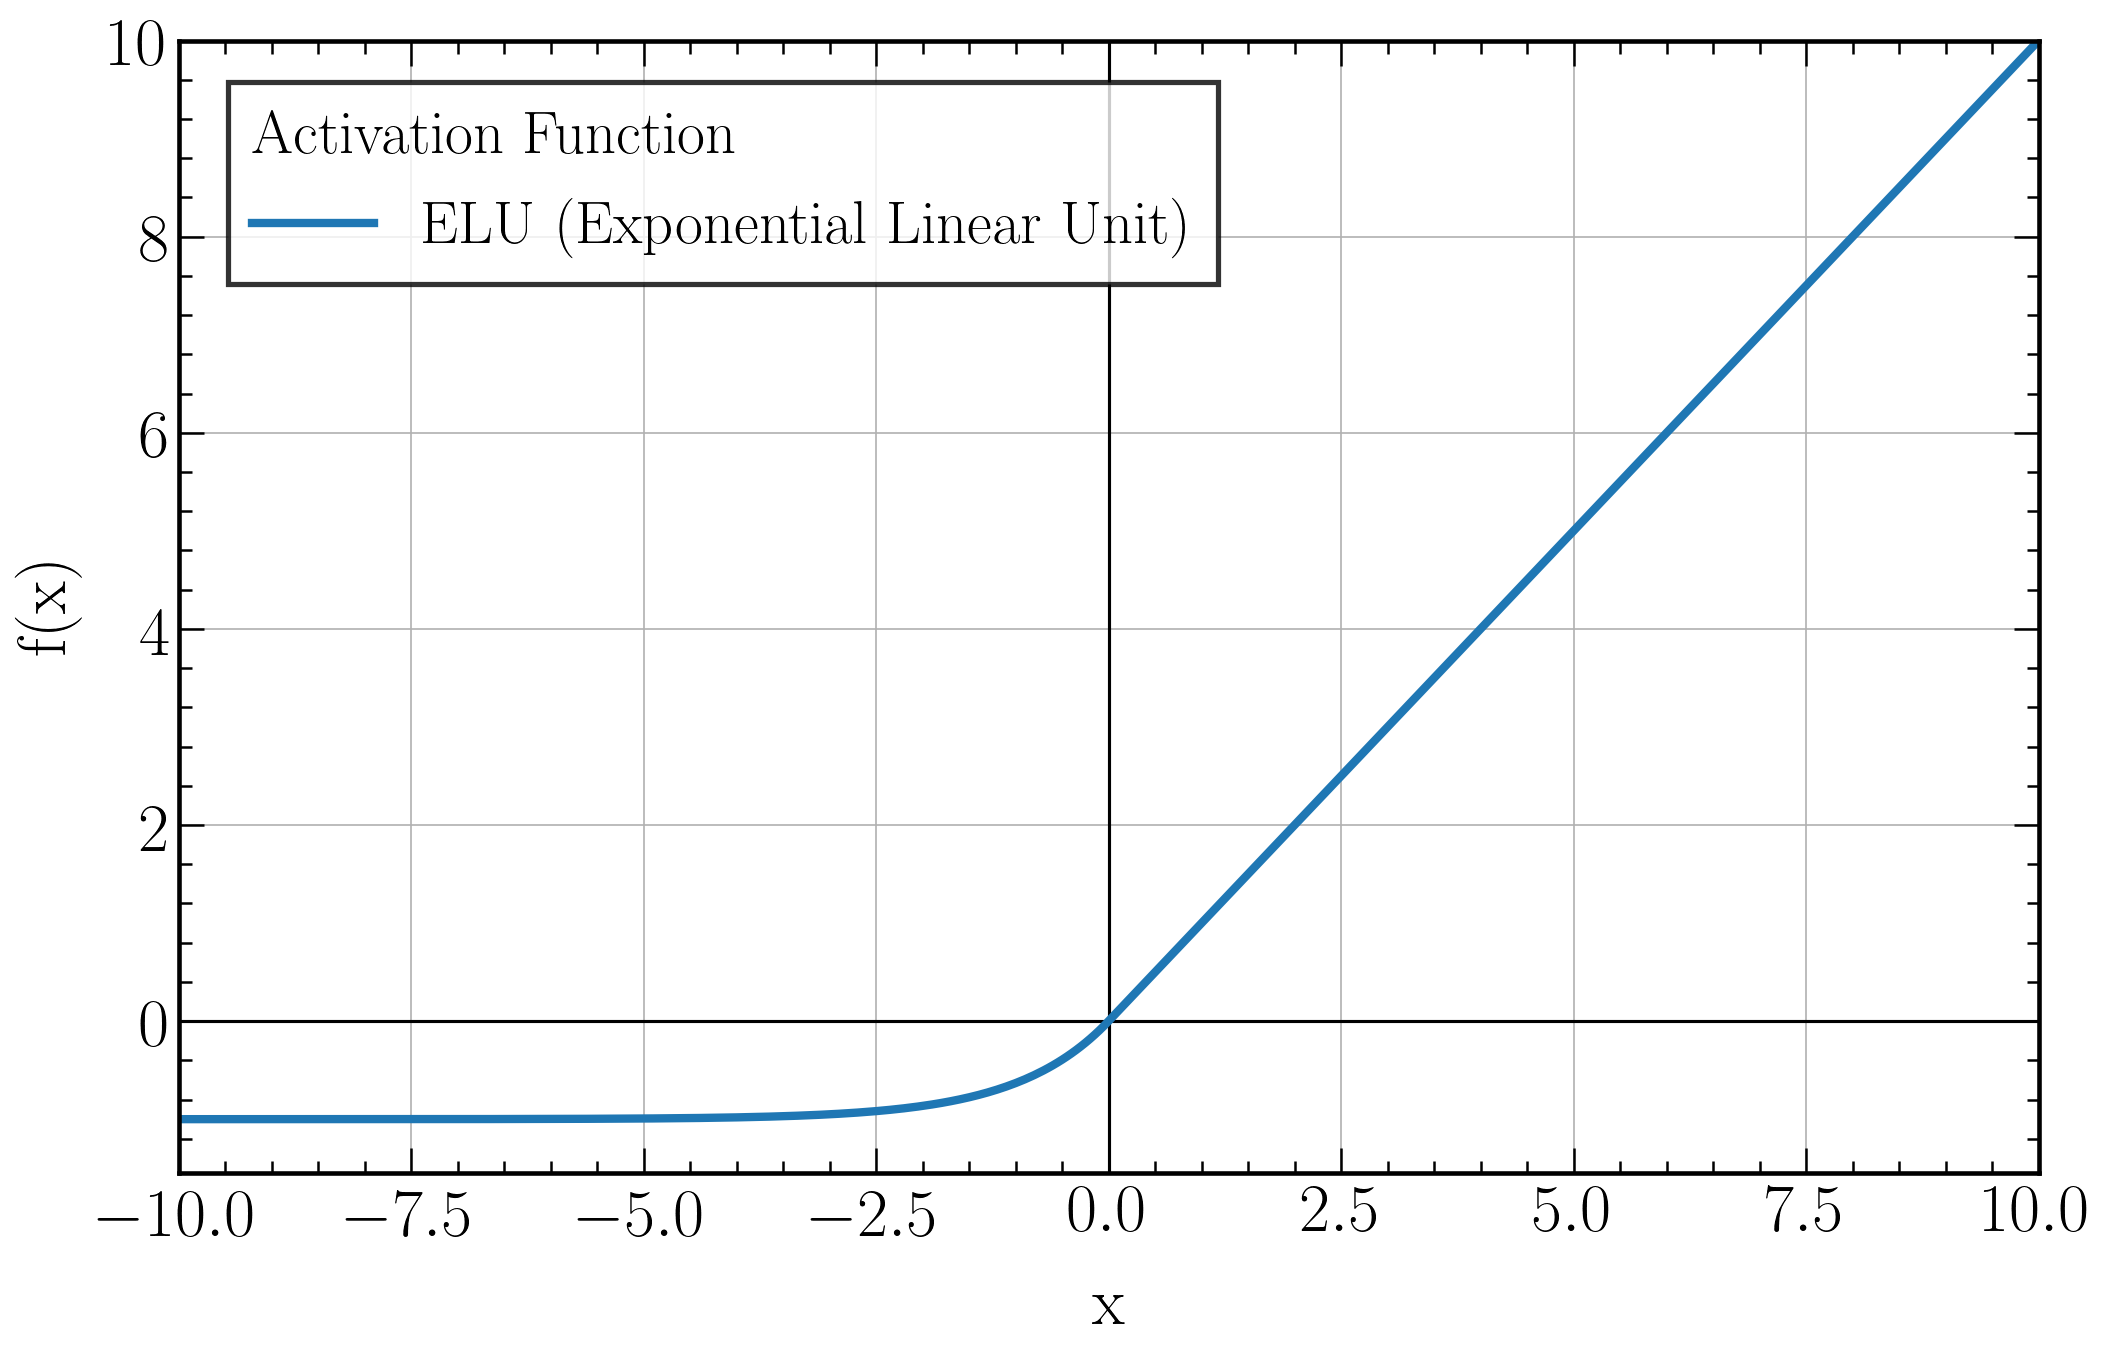

In [11]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, elu(x_list, 1.0), label = 'ELU (Exponential Linear Unit)', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ELU.png")
plt.show()

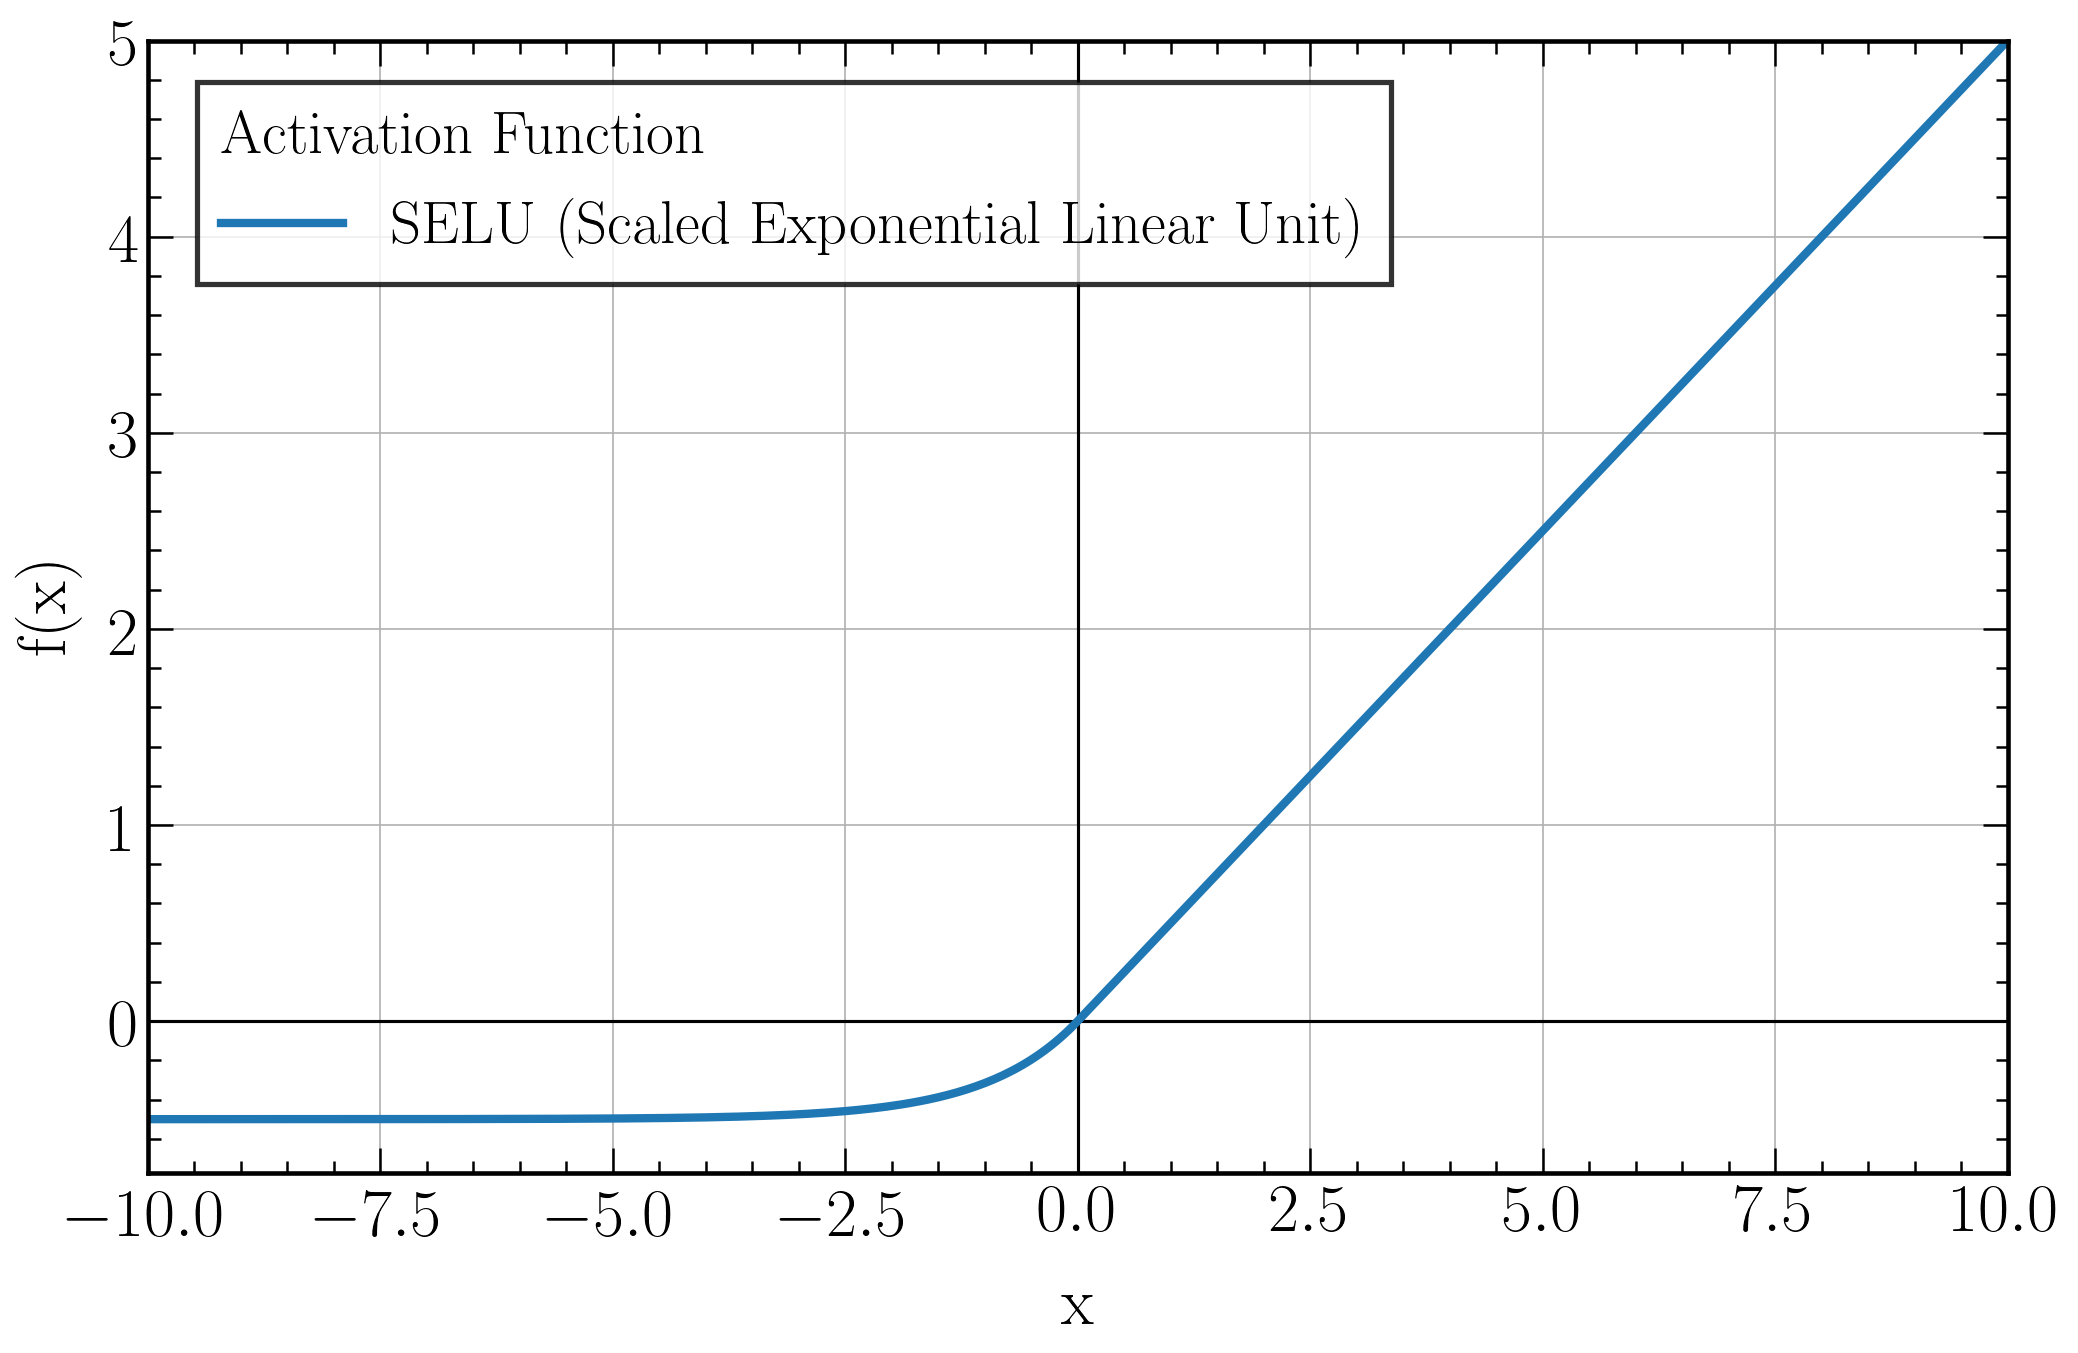

In [12]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, selu(x_list, 1.0, 0.5), label = 'SELU (Scaled Exponential Linear Unit)', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=5)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_SELU.png")
plt.show()

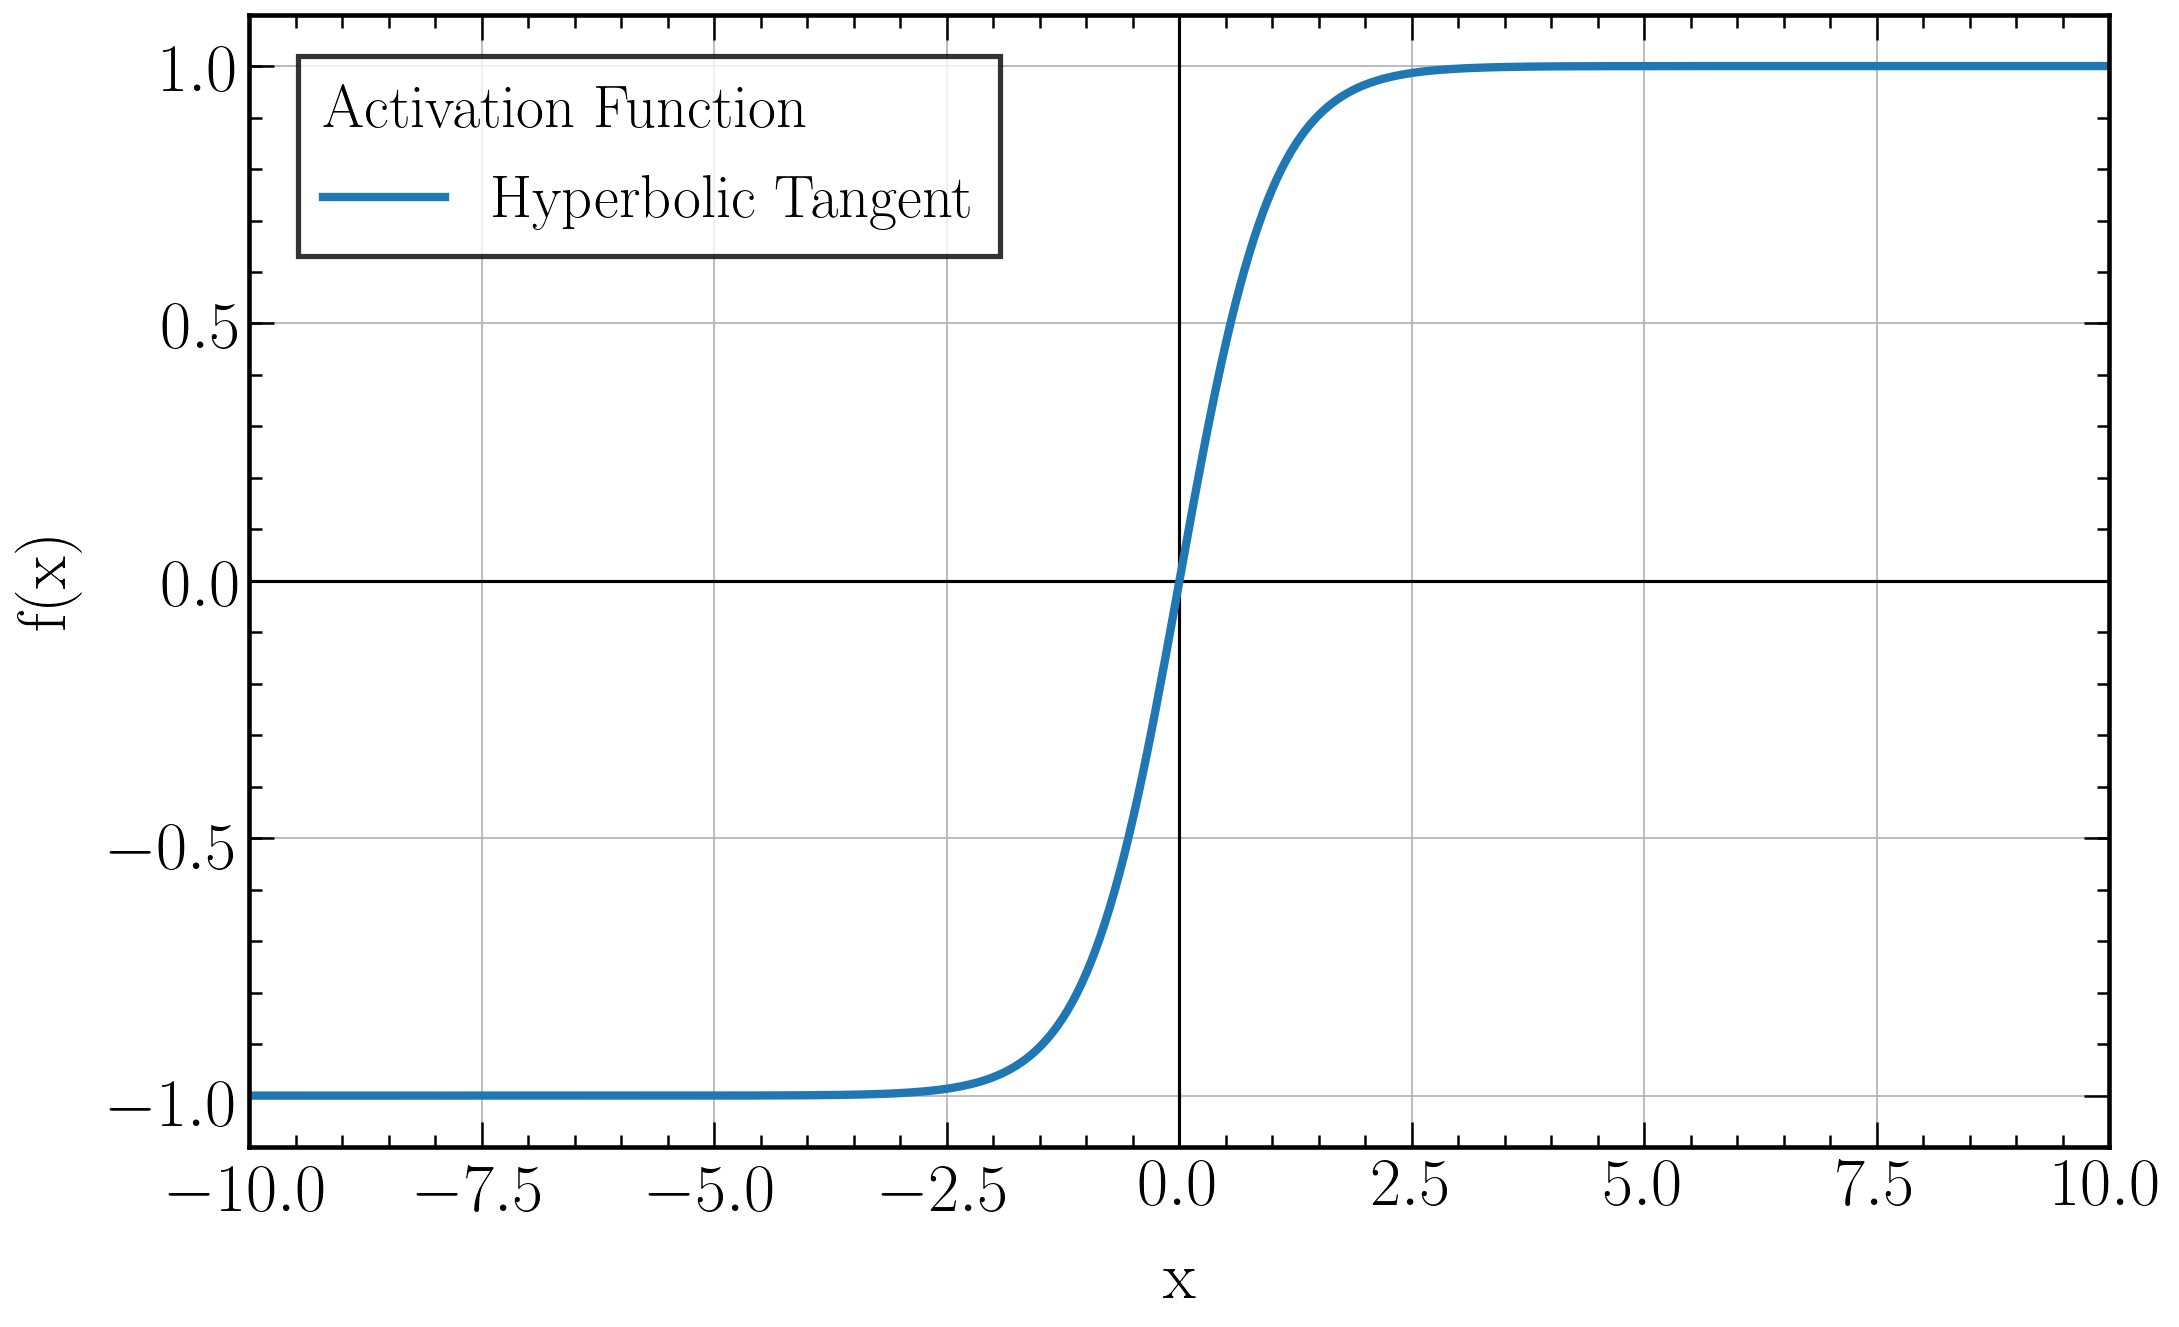

In [13]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, tanh(x_list), label = 'Hyperbolic Tangent', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_tanh.png")
plt.show()

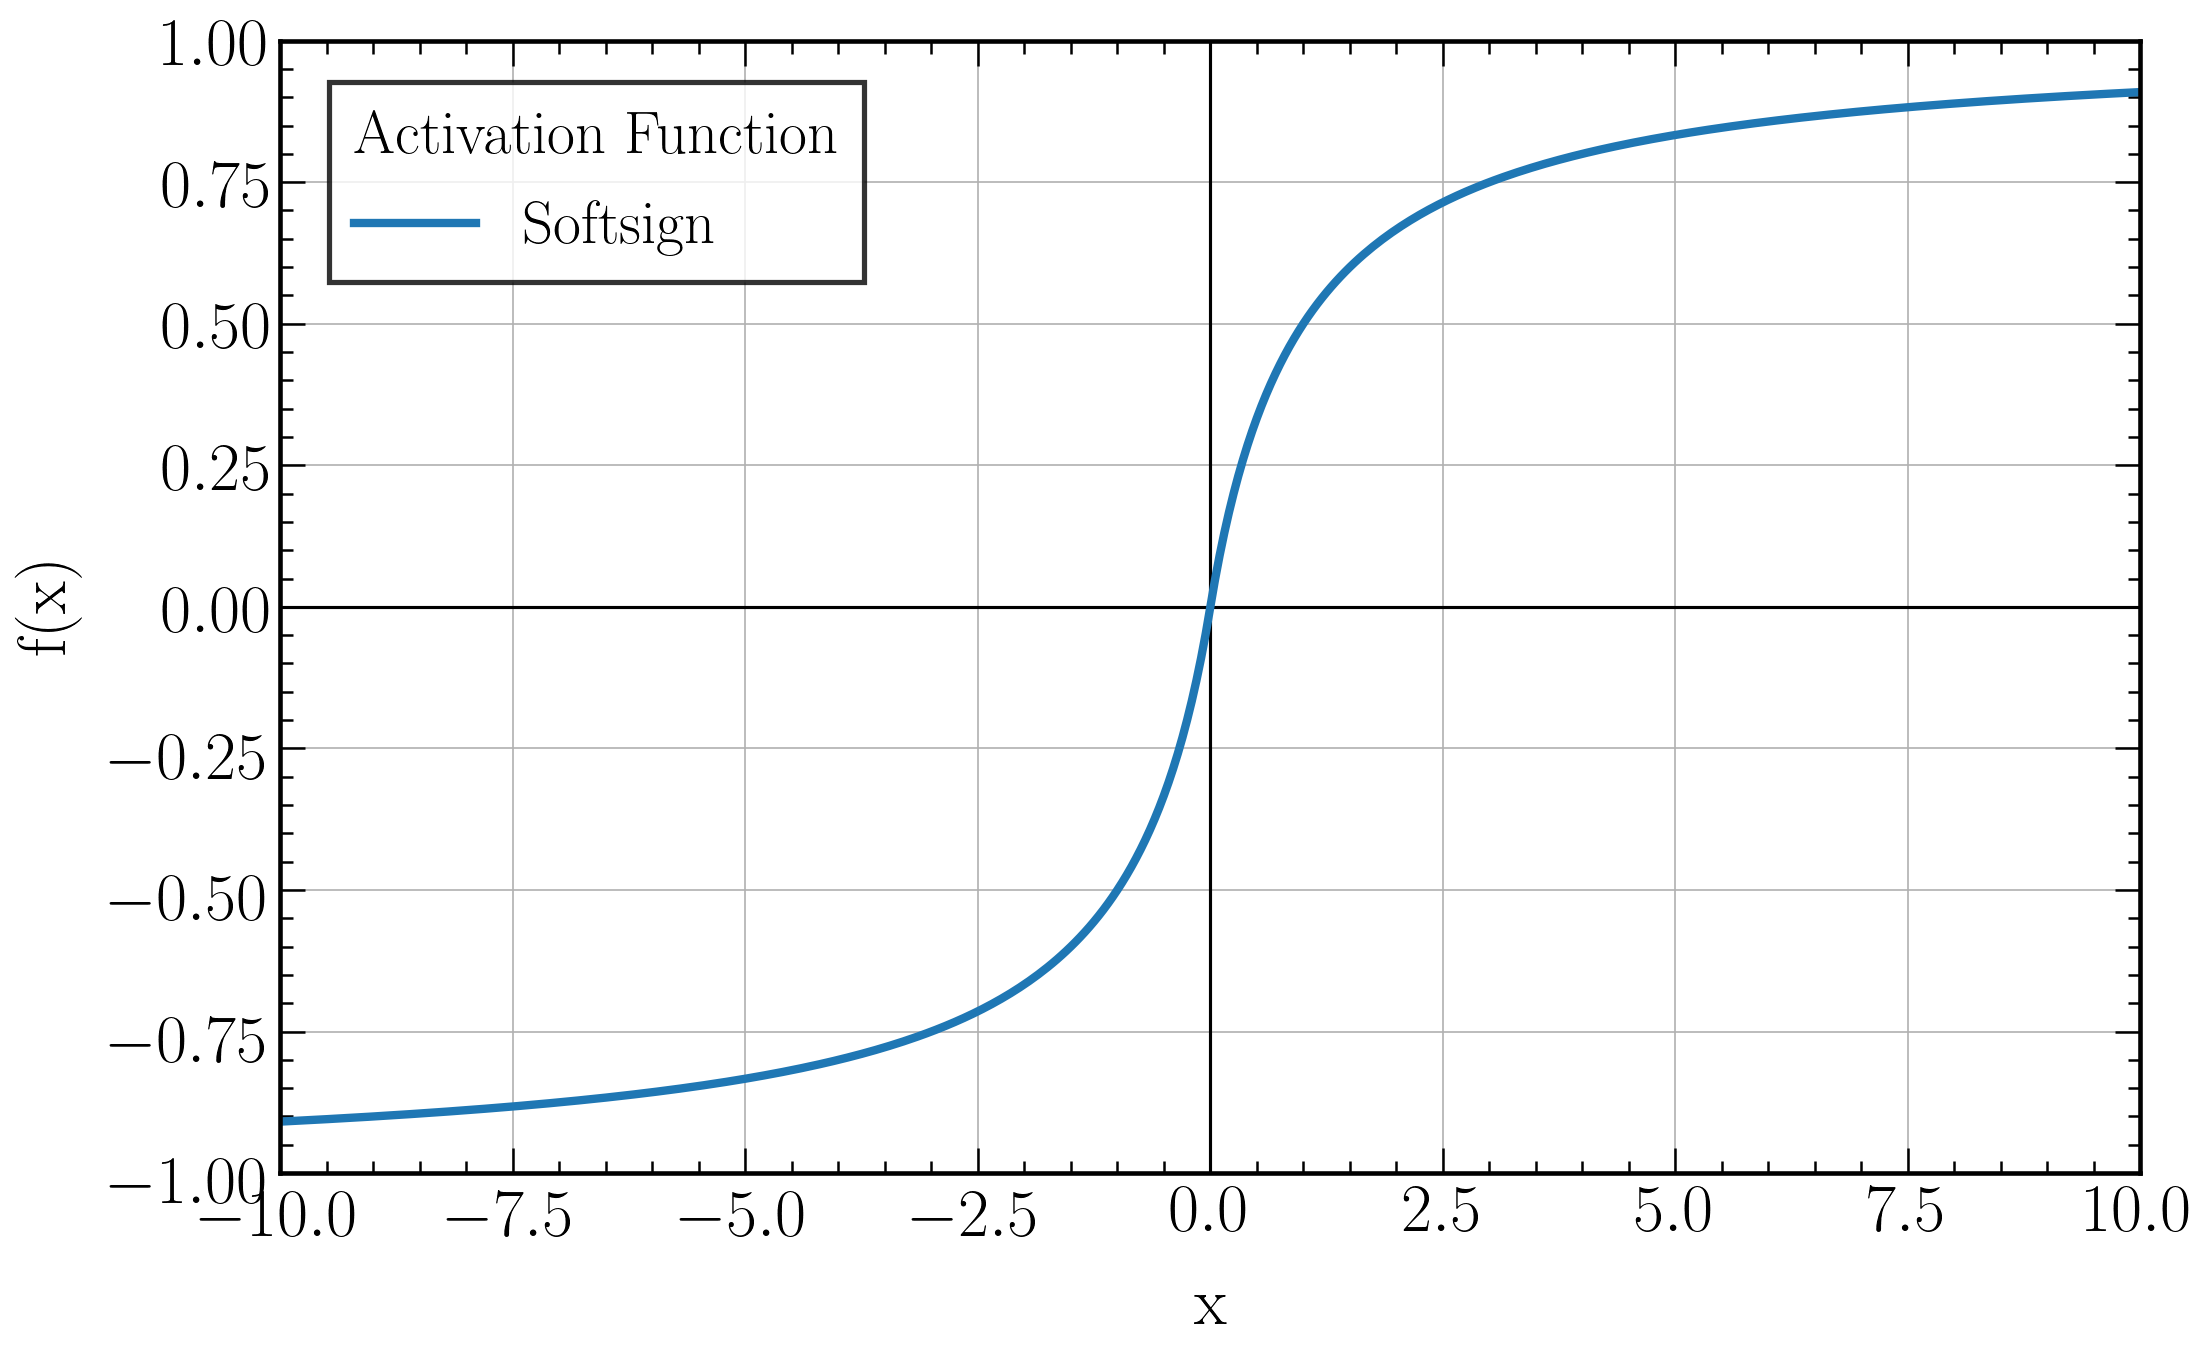

In [14]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, softsign(x_list), label = 'Softsign', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Softsign.png")
plt.show()

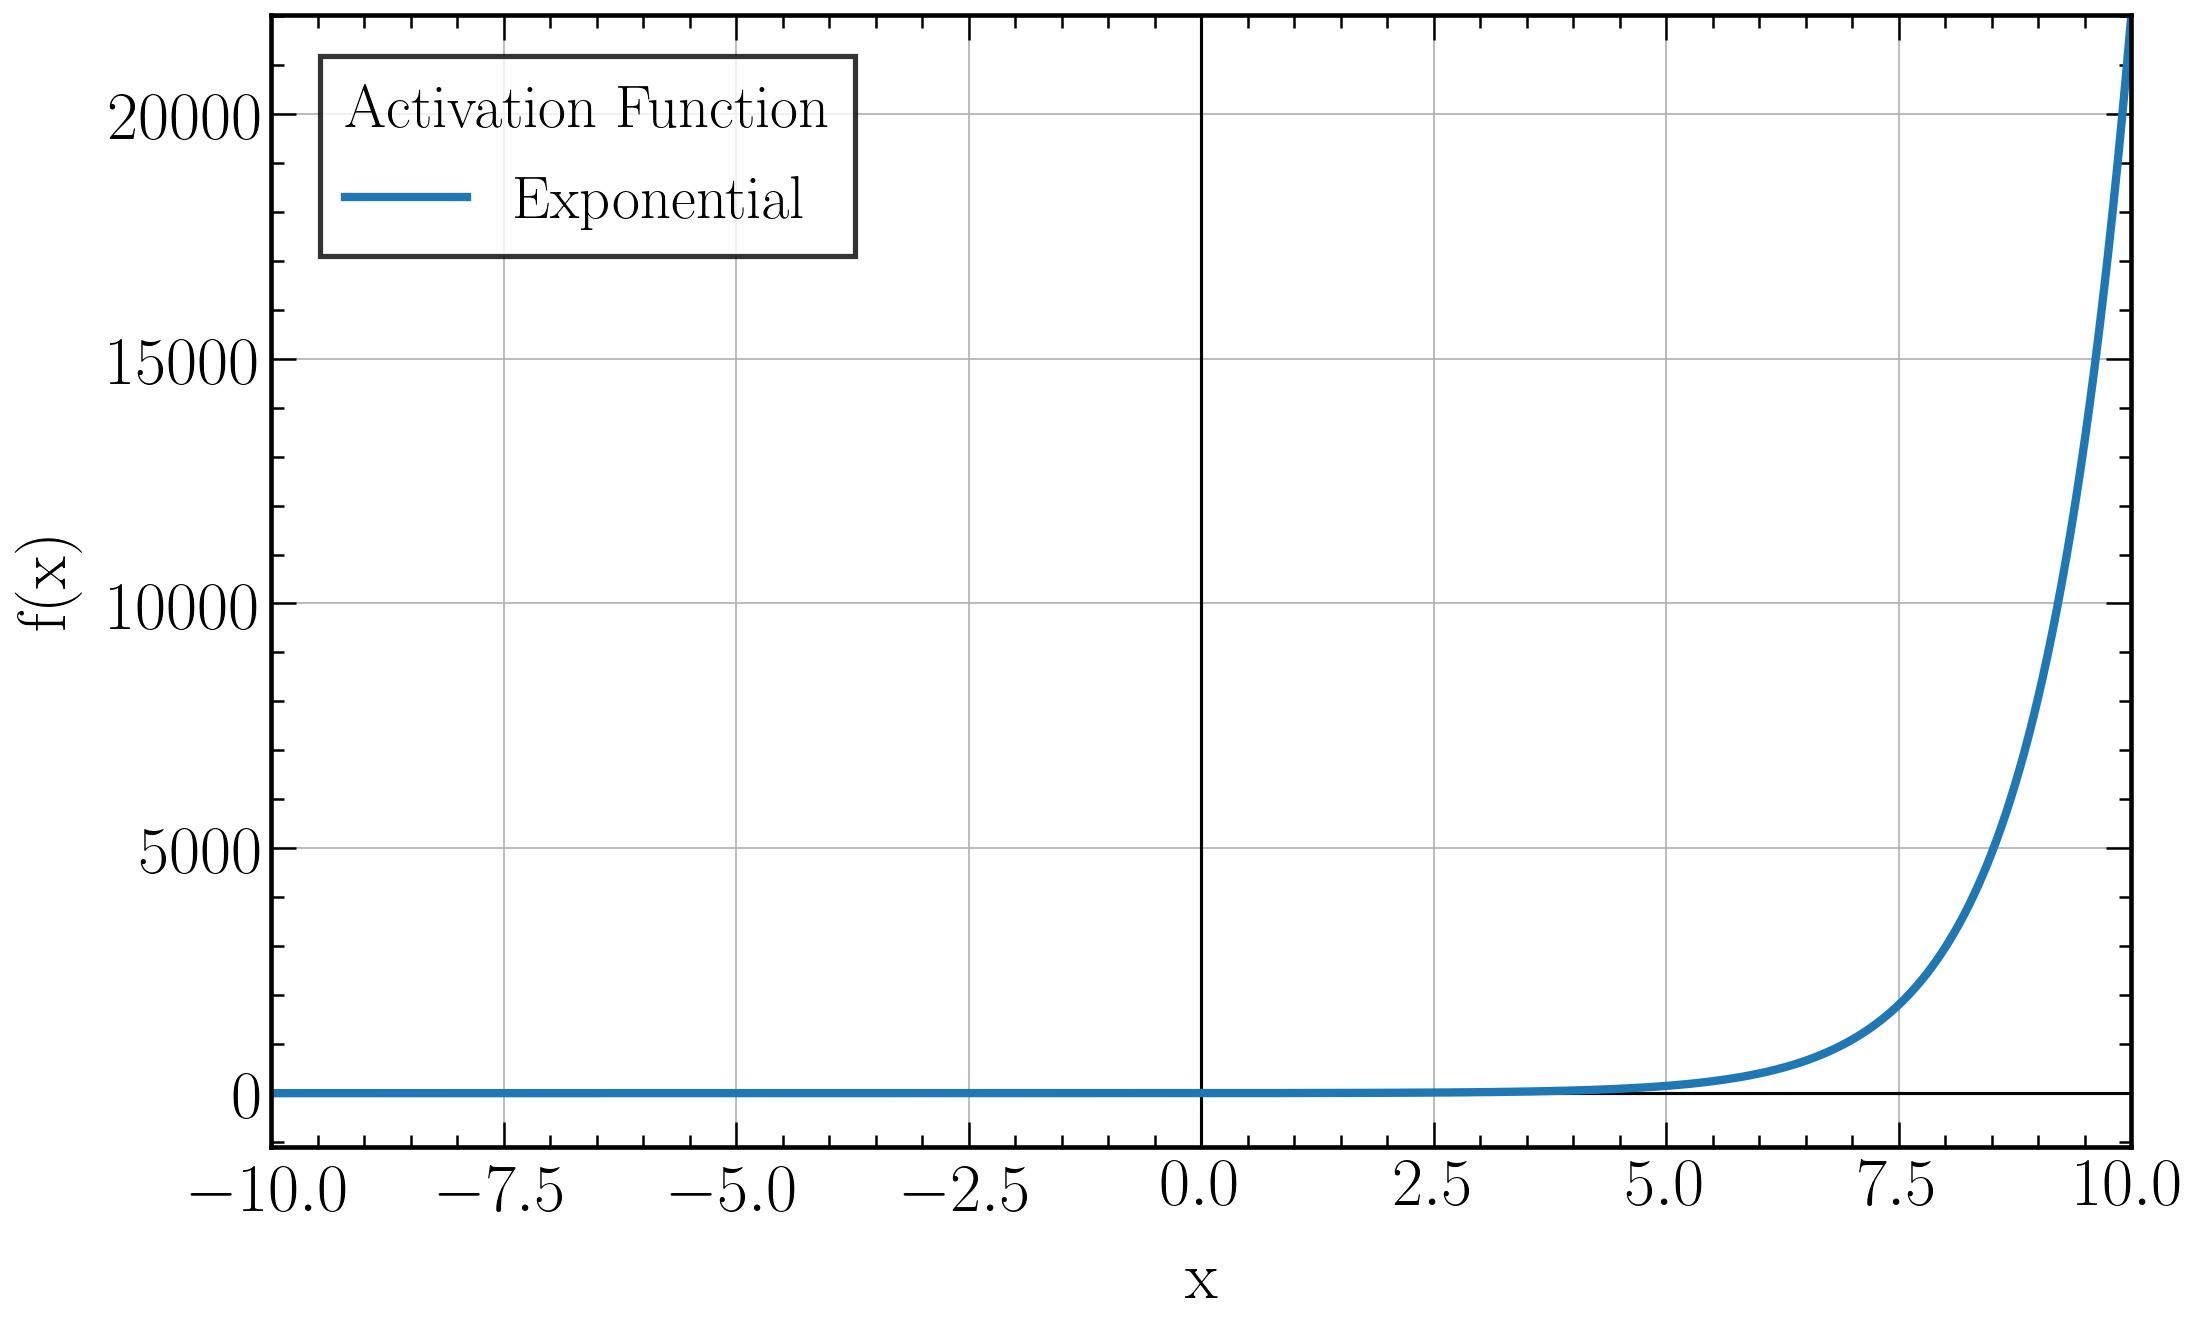

In [15]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, exponential(x_list), label = 'Exponential', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=exponential(10))
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Exponential.png")
plt.show()

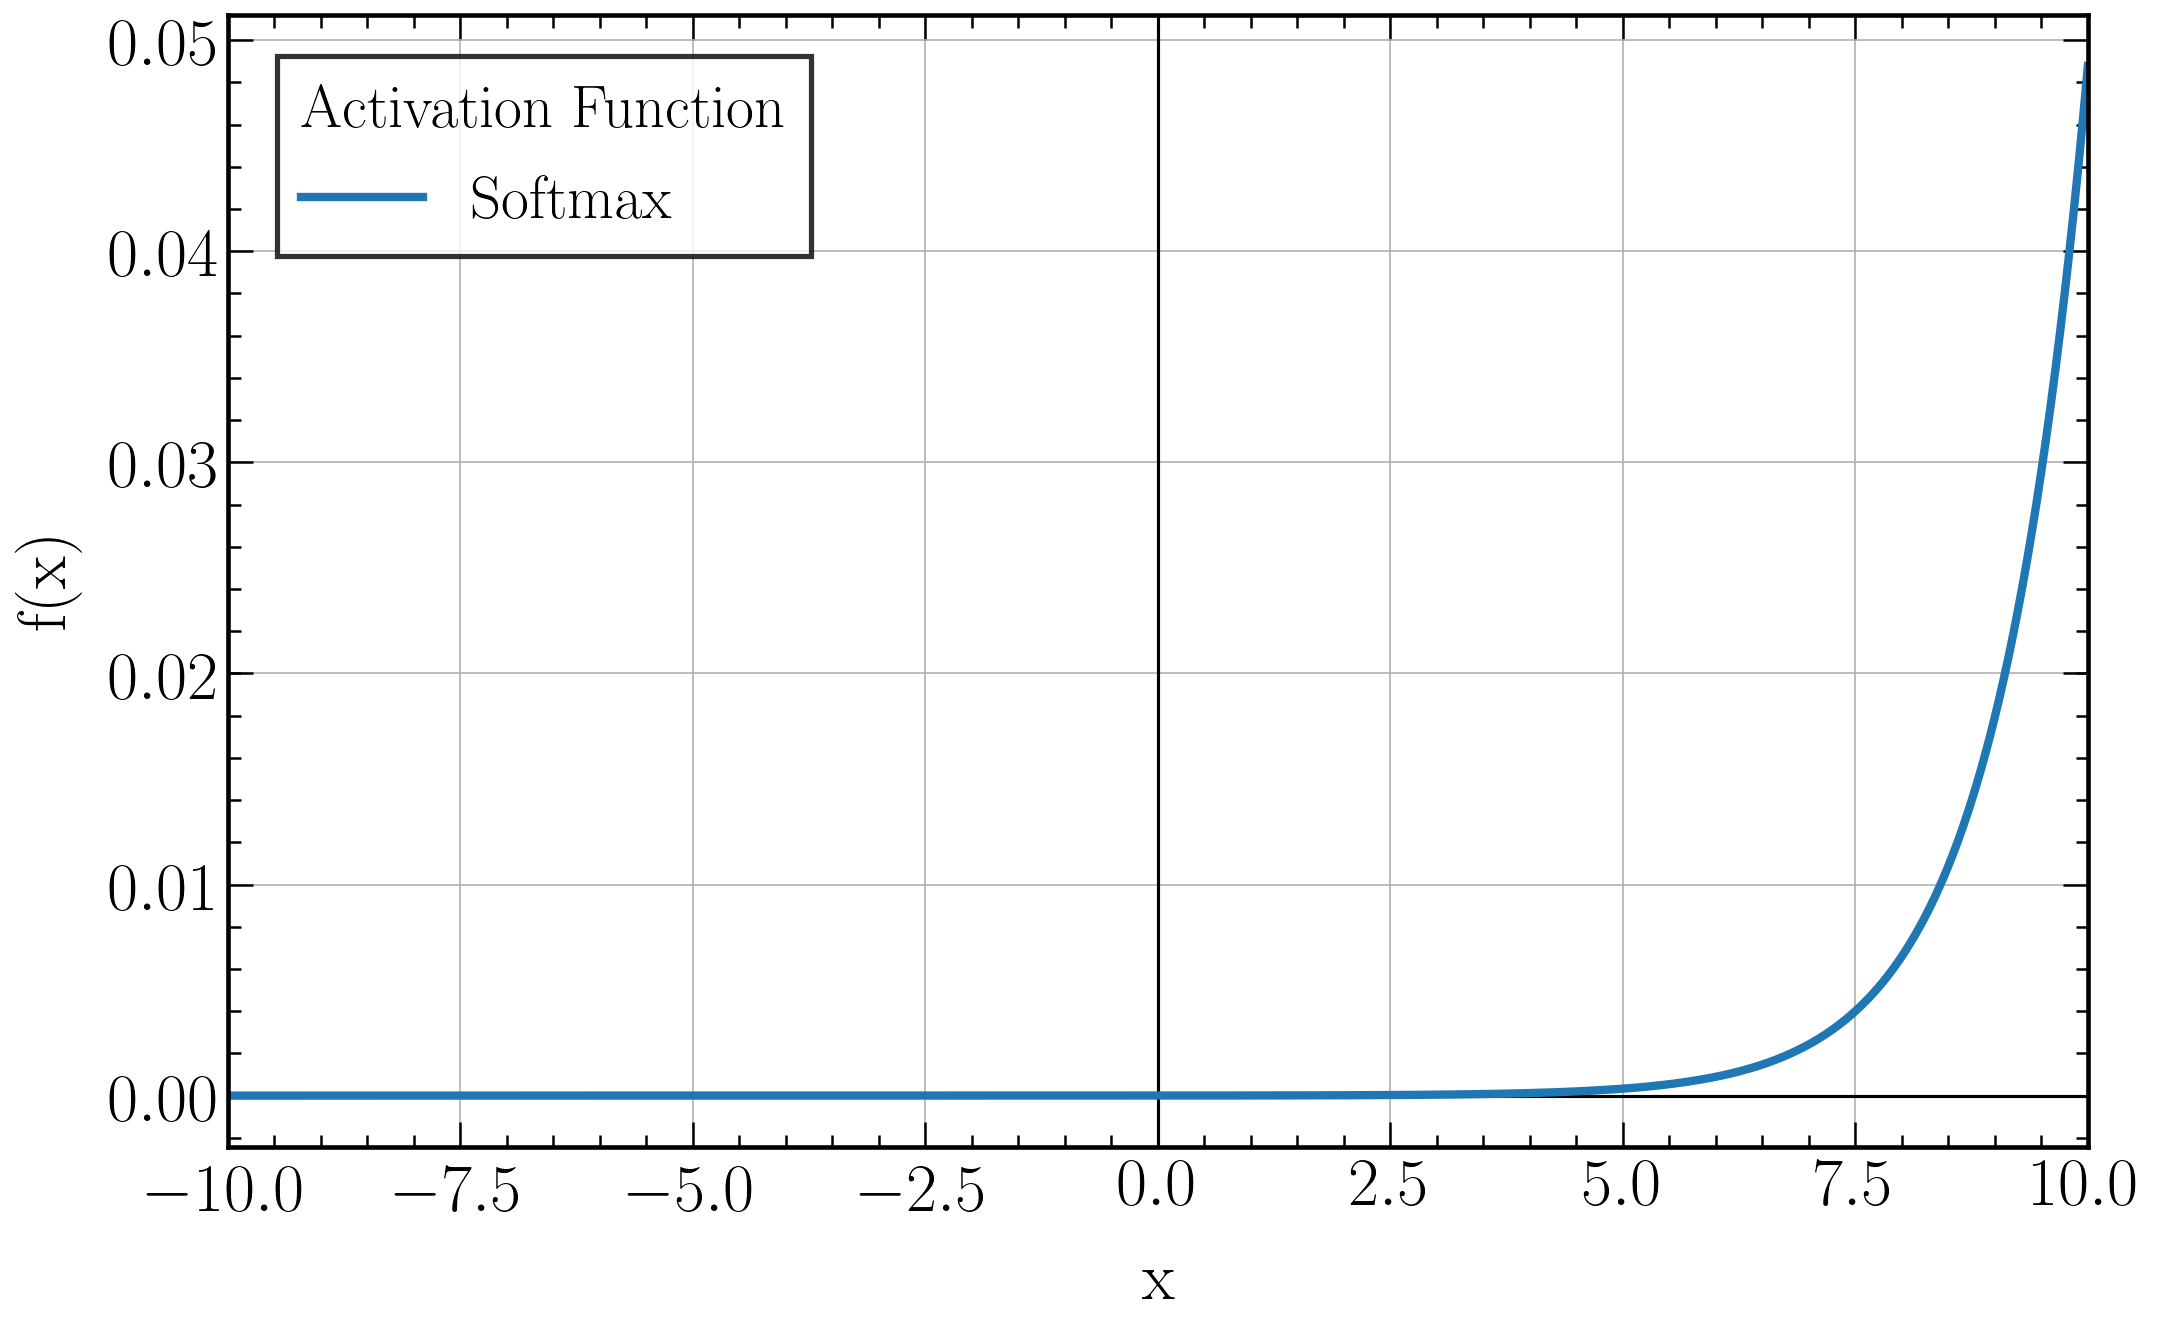

In [16]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, softmax(x_list), label = 'Softmax', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=softmax(10))
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Softmax.png")
plt.show()

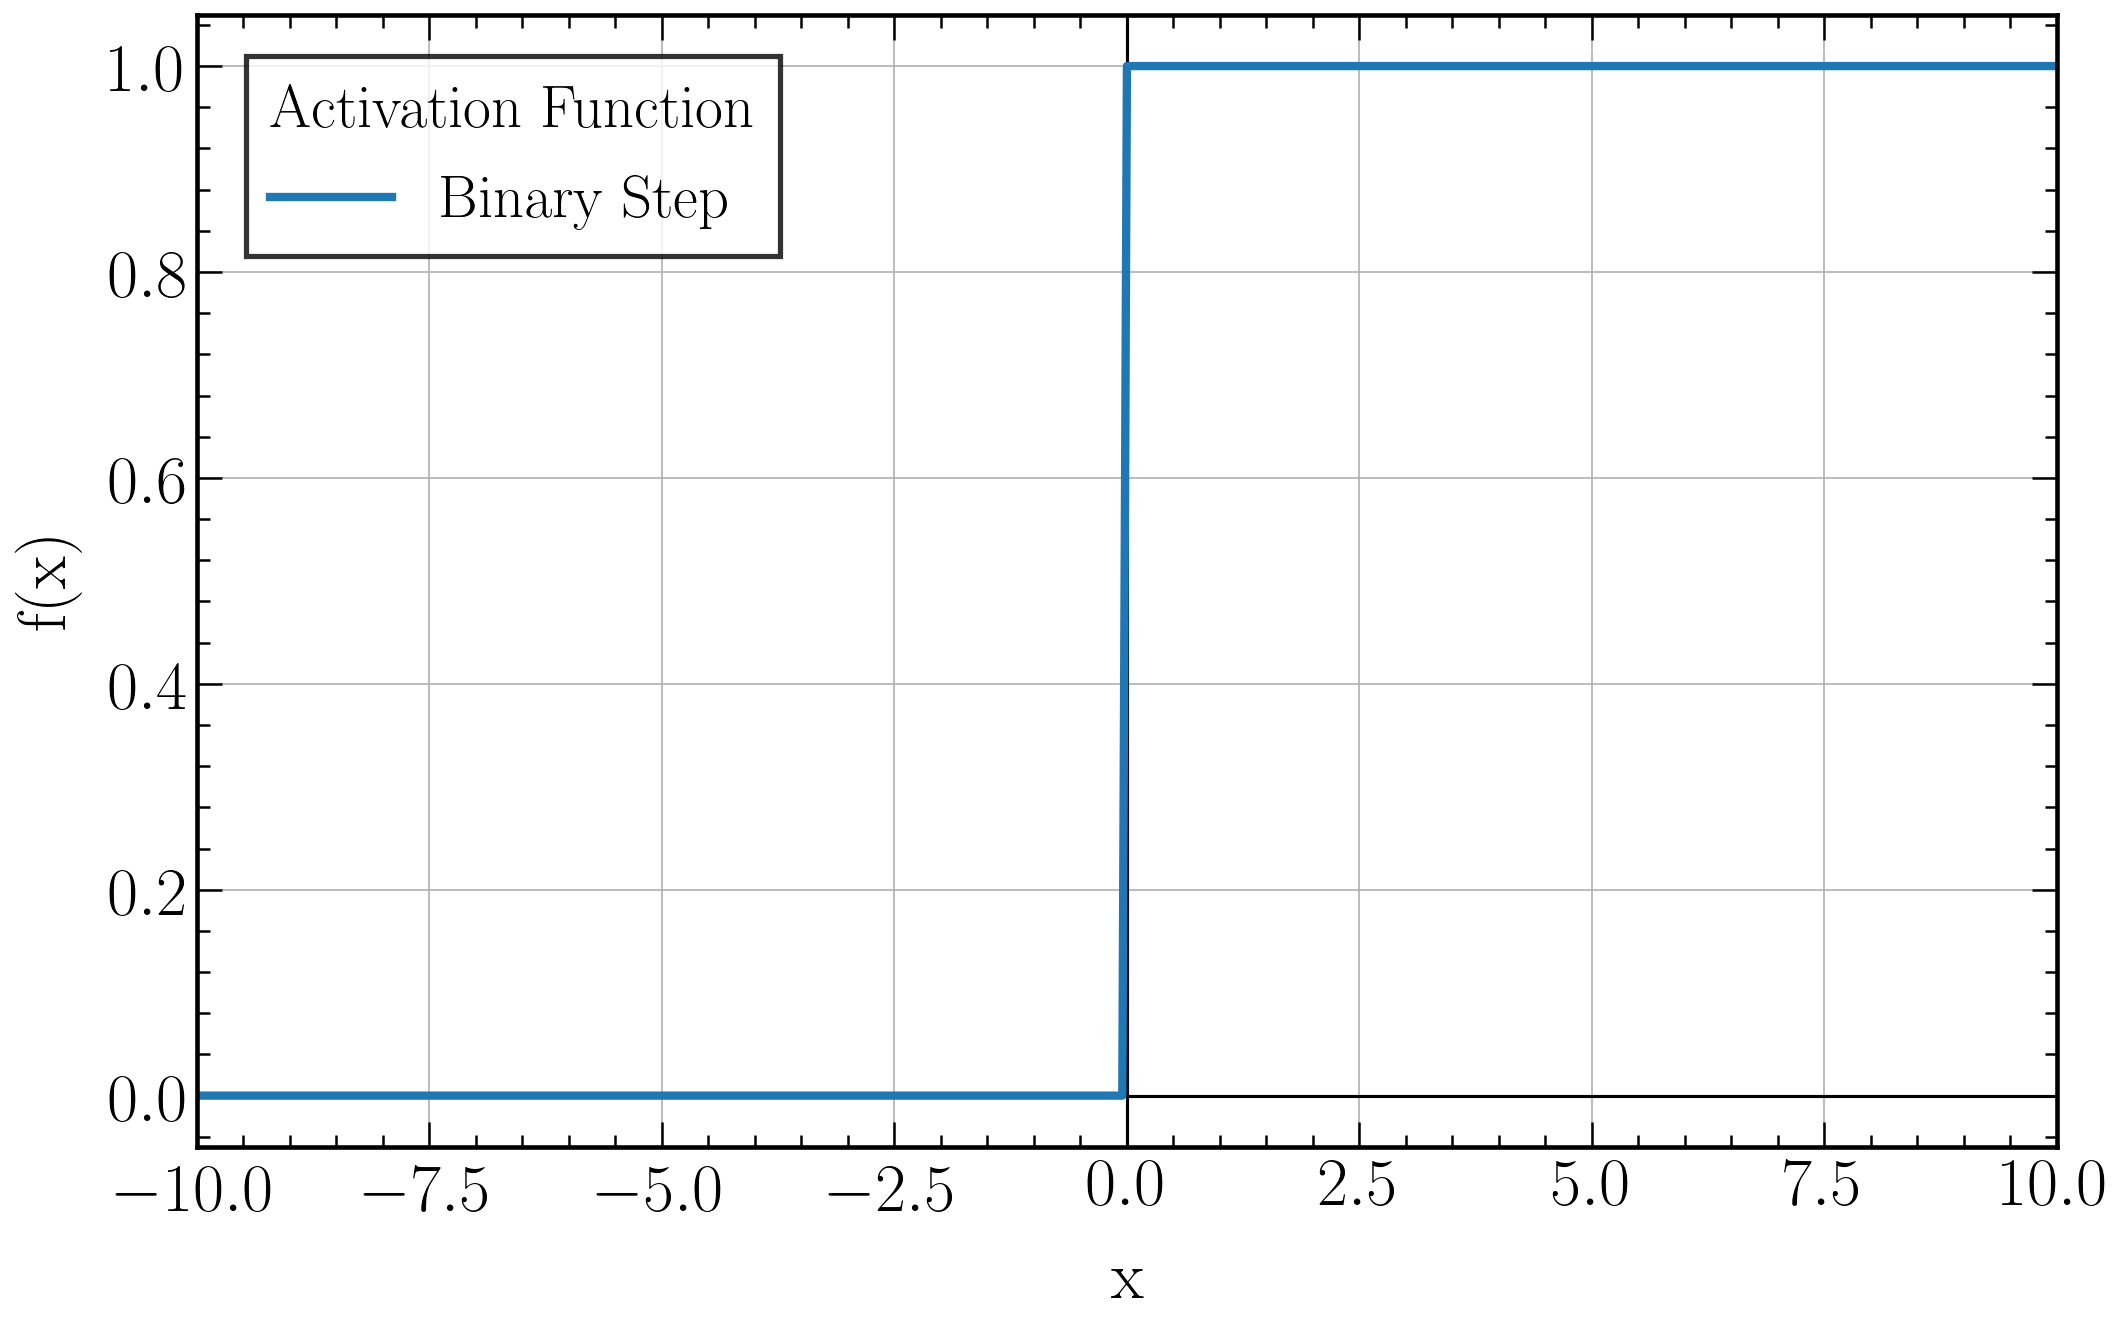

In [17]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, step(x_list), label = 'Binary Step', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_BinaryStep.png")
plt.show()

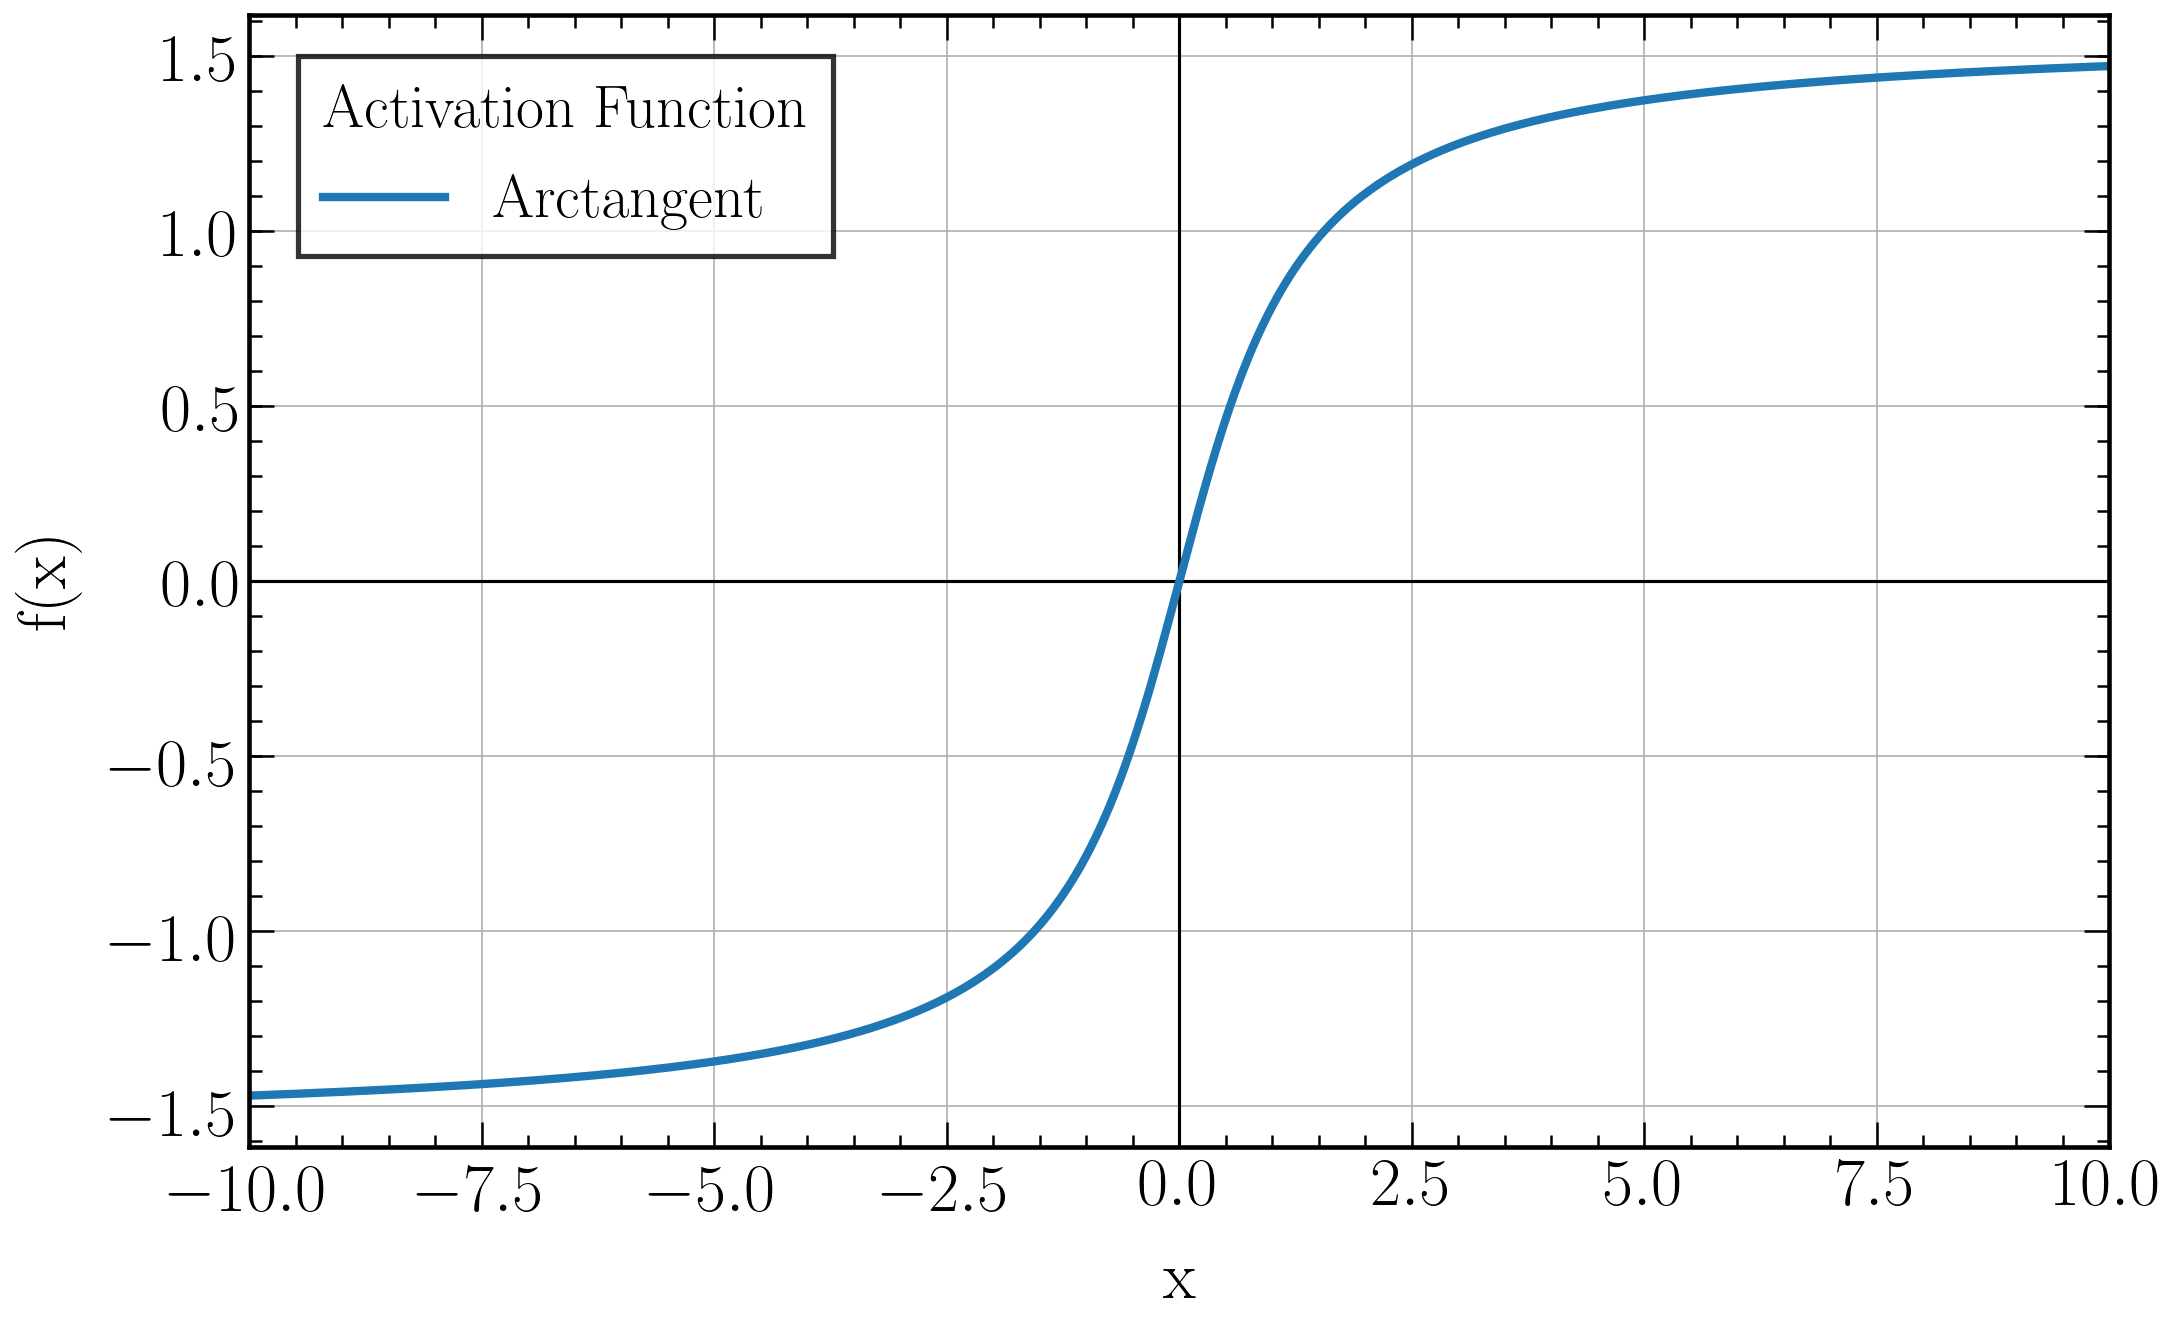

In [18]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, arctan(x_list), label = 'Arctangent', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Arctangent.png")
plt.show()

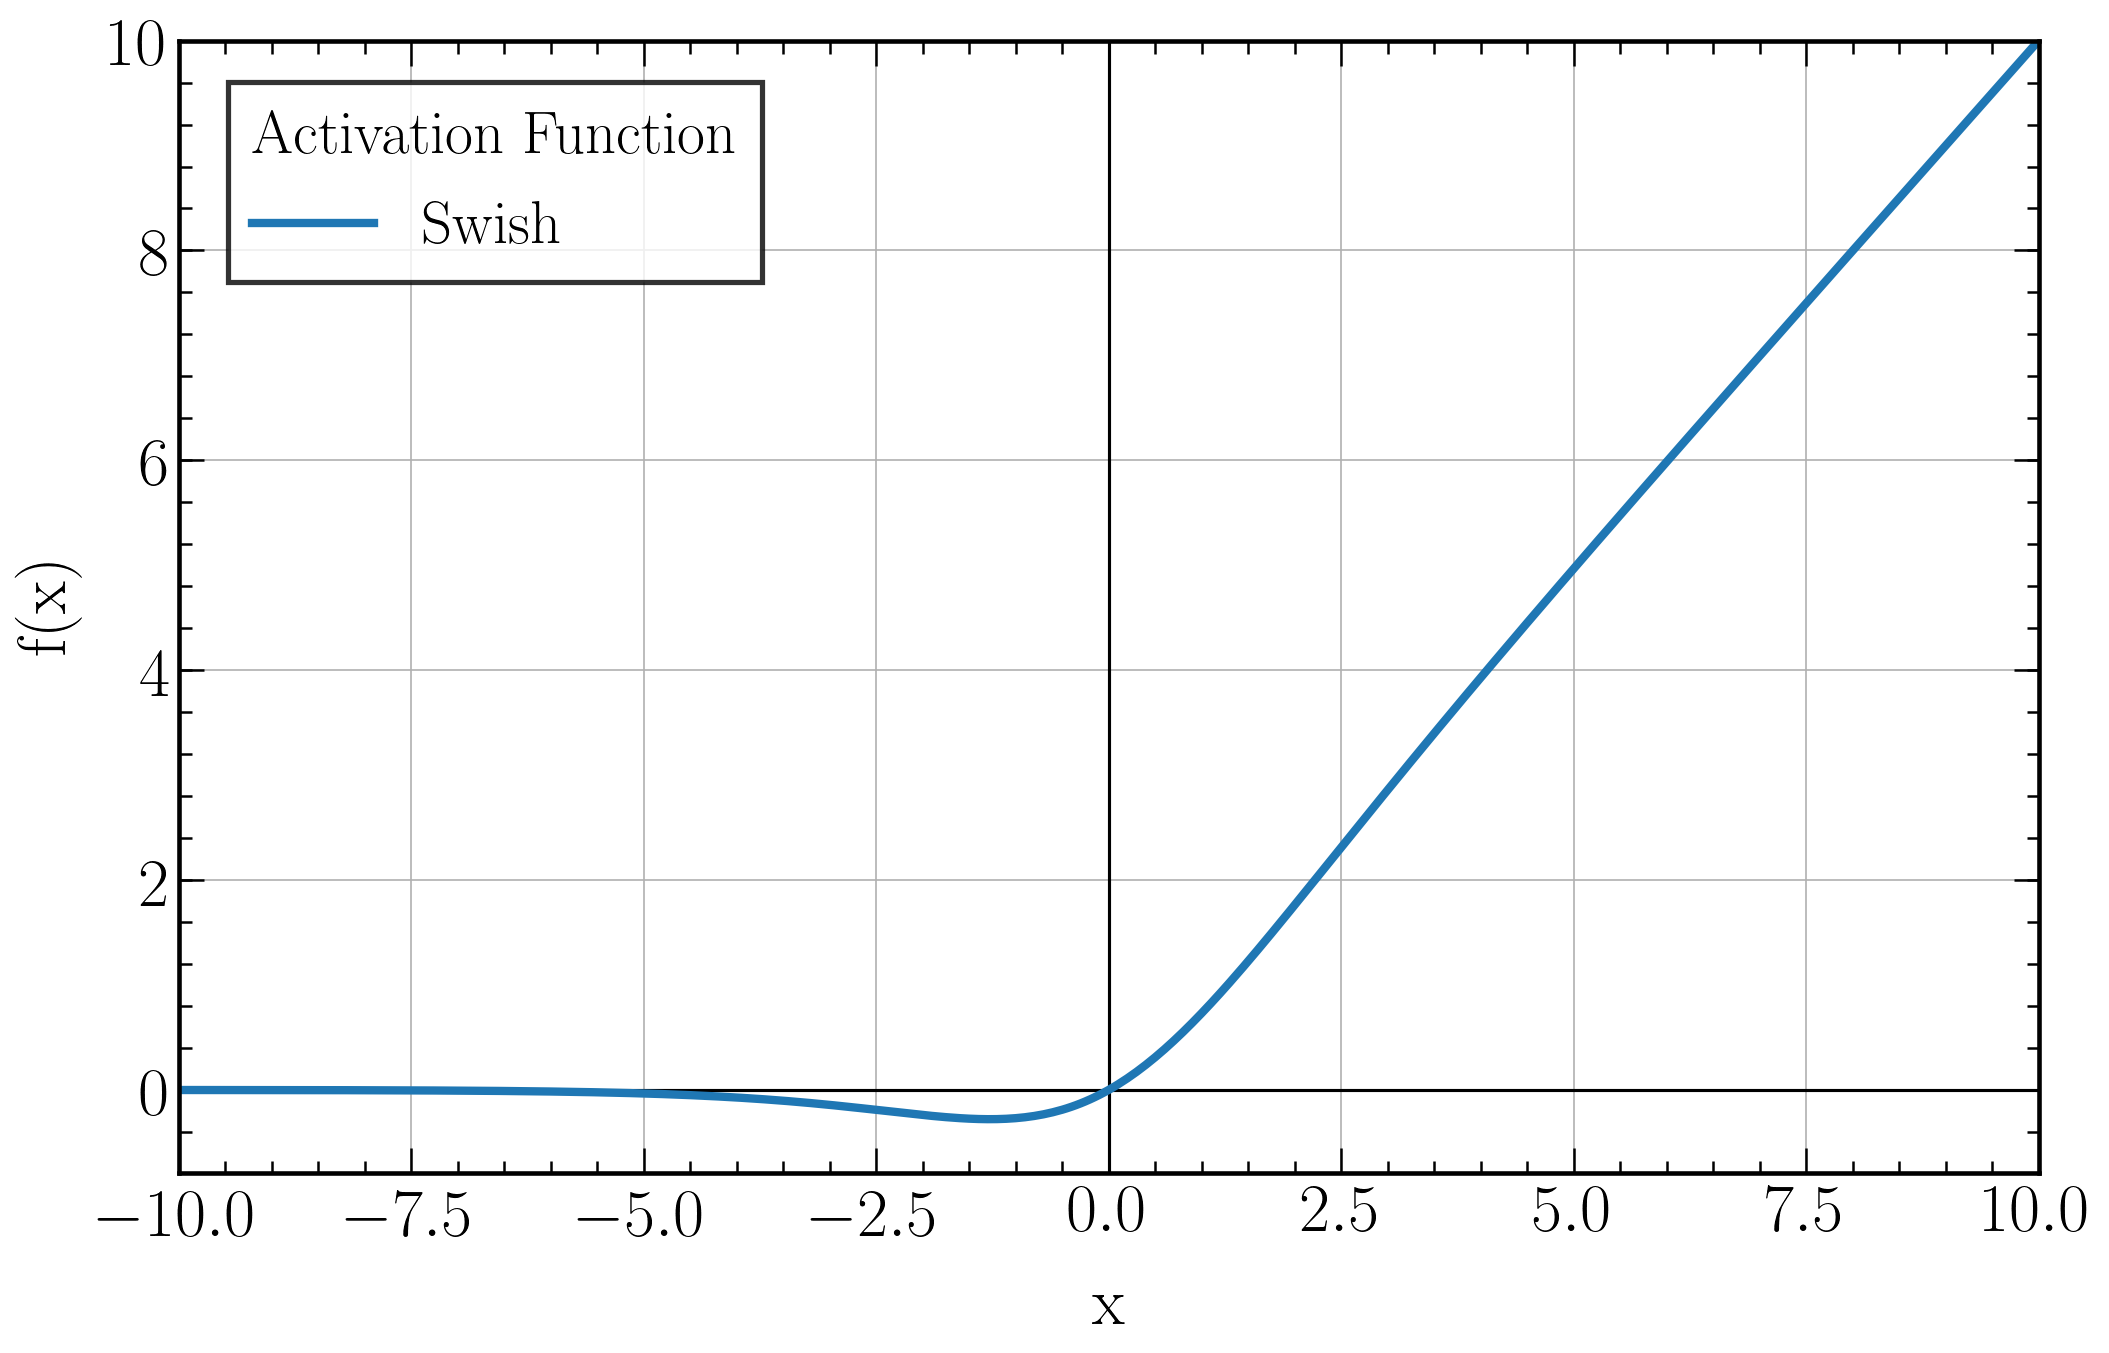

In [19]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'k')
plt.axvline(x=0, color = 'k')

plt.plot(x_list, swish(x_list), label = 'Swish', linewidth = 4.0)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Swish.png")
plt.show()

## ReLU-like

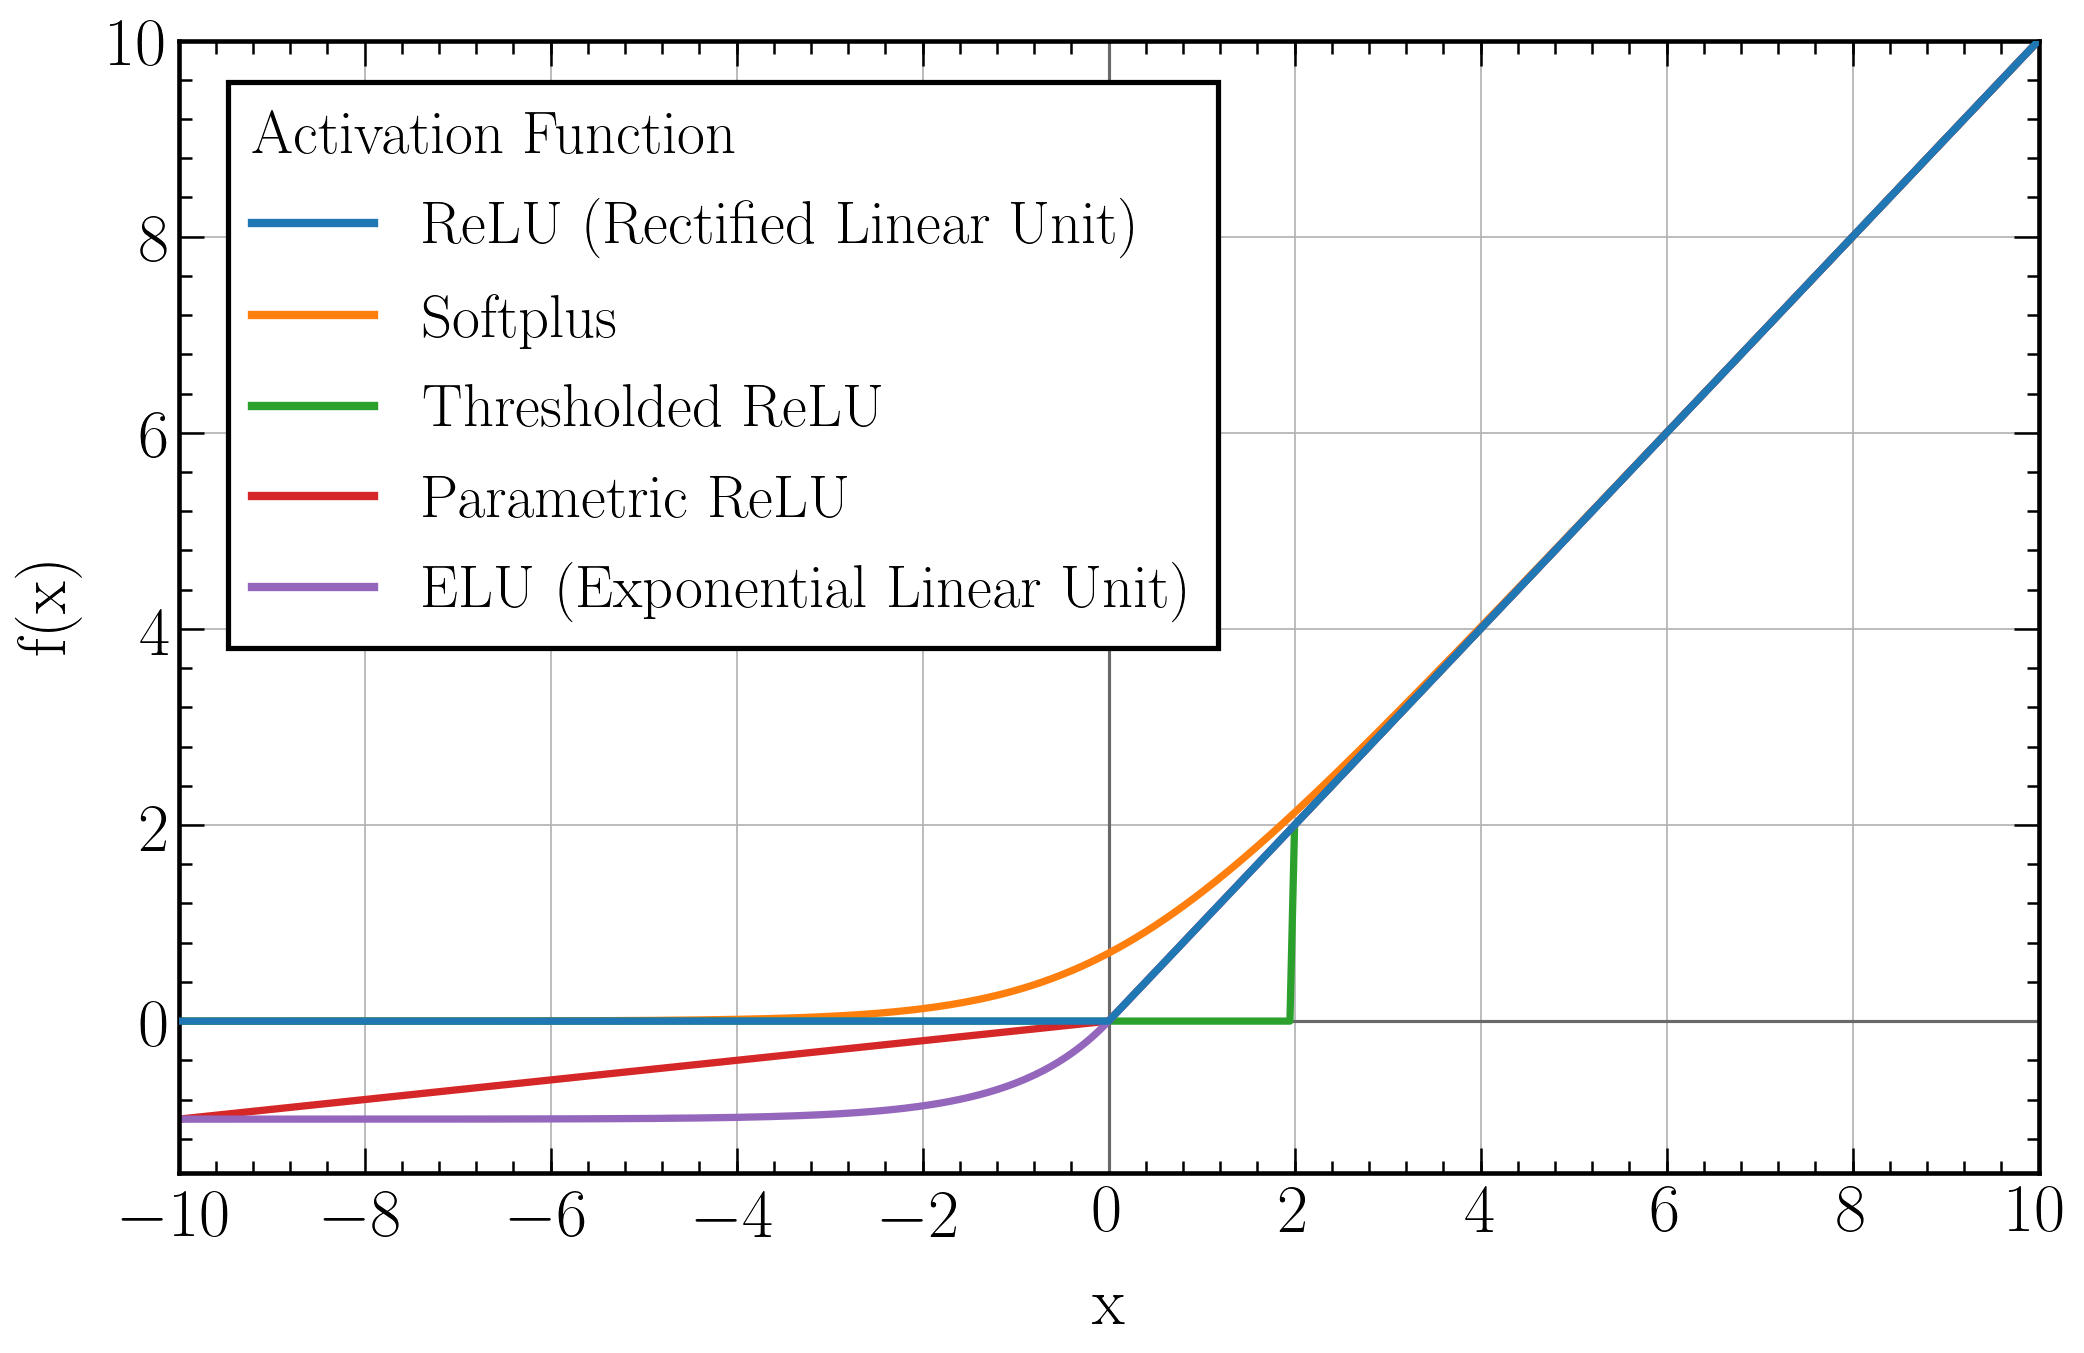

In [20]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, relu(x_list), label = 'ReLU (Rectified Linear Unit)', linewidth =3.5, zorder = 10)
plt.plot(x_list, softplus(x_list), label = 'Softplus', linewidth =3.5)
plt.plot(x_list, thresholdedrelu(x_list, 2.0), label = 'Thresholded ReLU', linewidth =3.5)
plt.plot(x_list, leaky_relu(x_list, 0.1), label = 'Parametric ReLU', linewidth =3.5)
plt.plot(x_list, elu(x_list, 1.0), label = 'ELU (Exponential Linear Unit)', linewidth =3.5)

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ReLU_like.png")
plt.show()

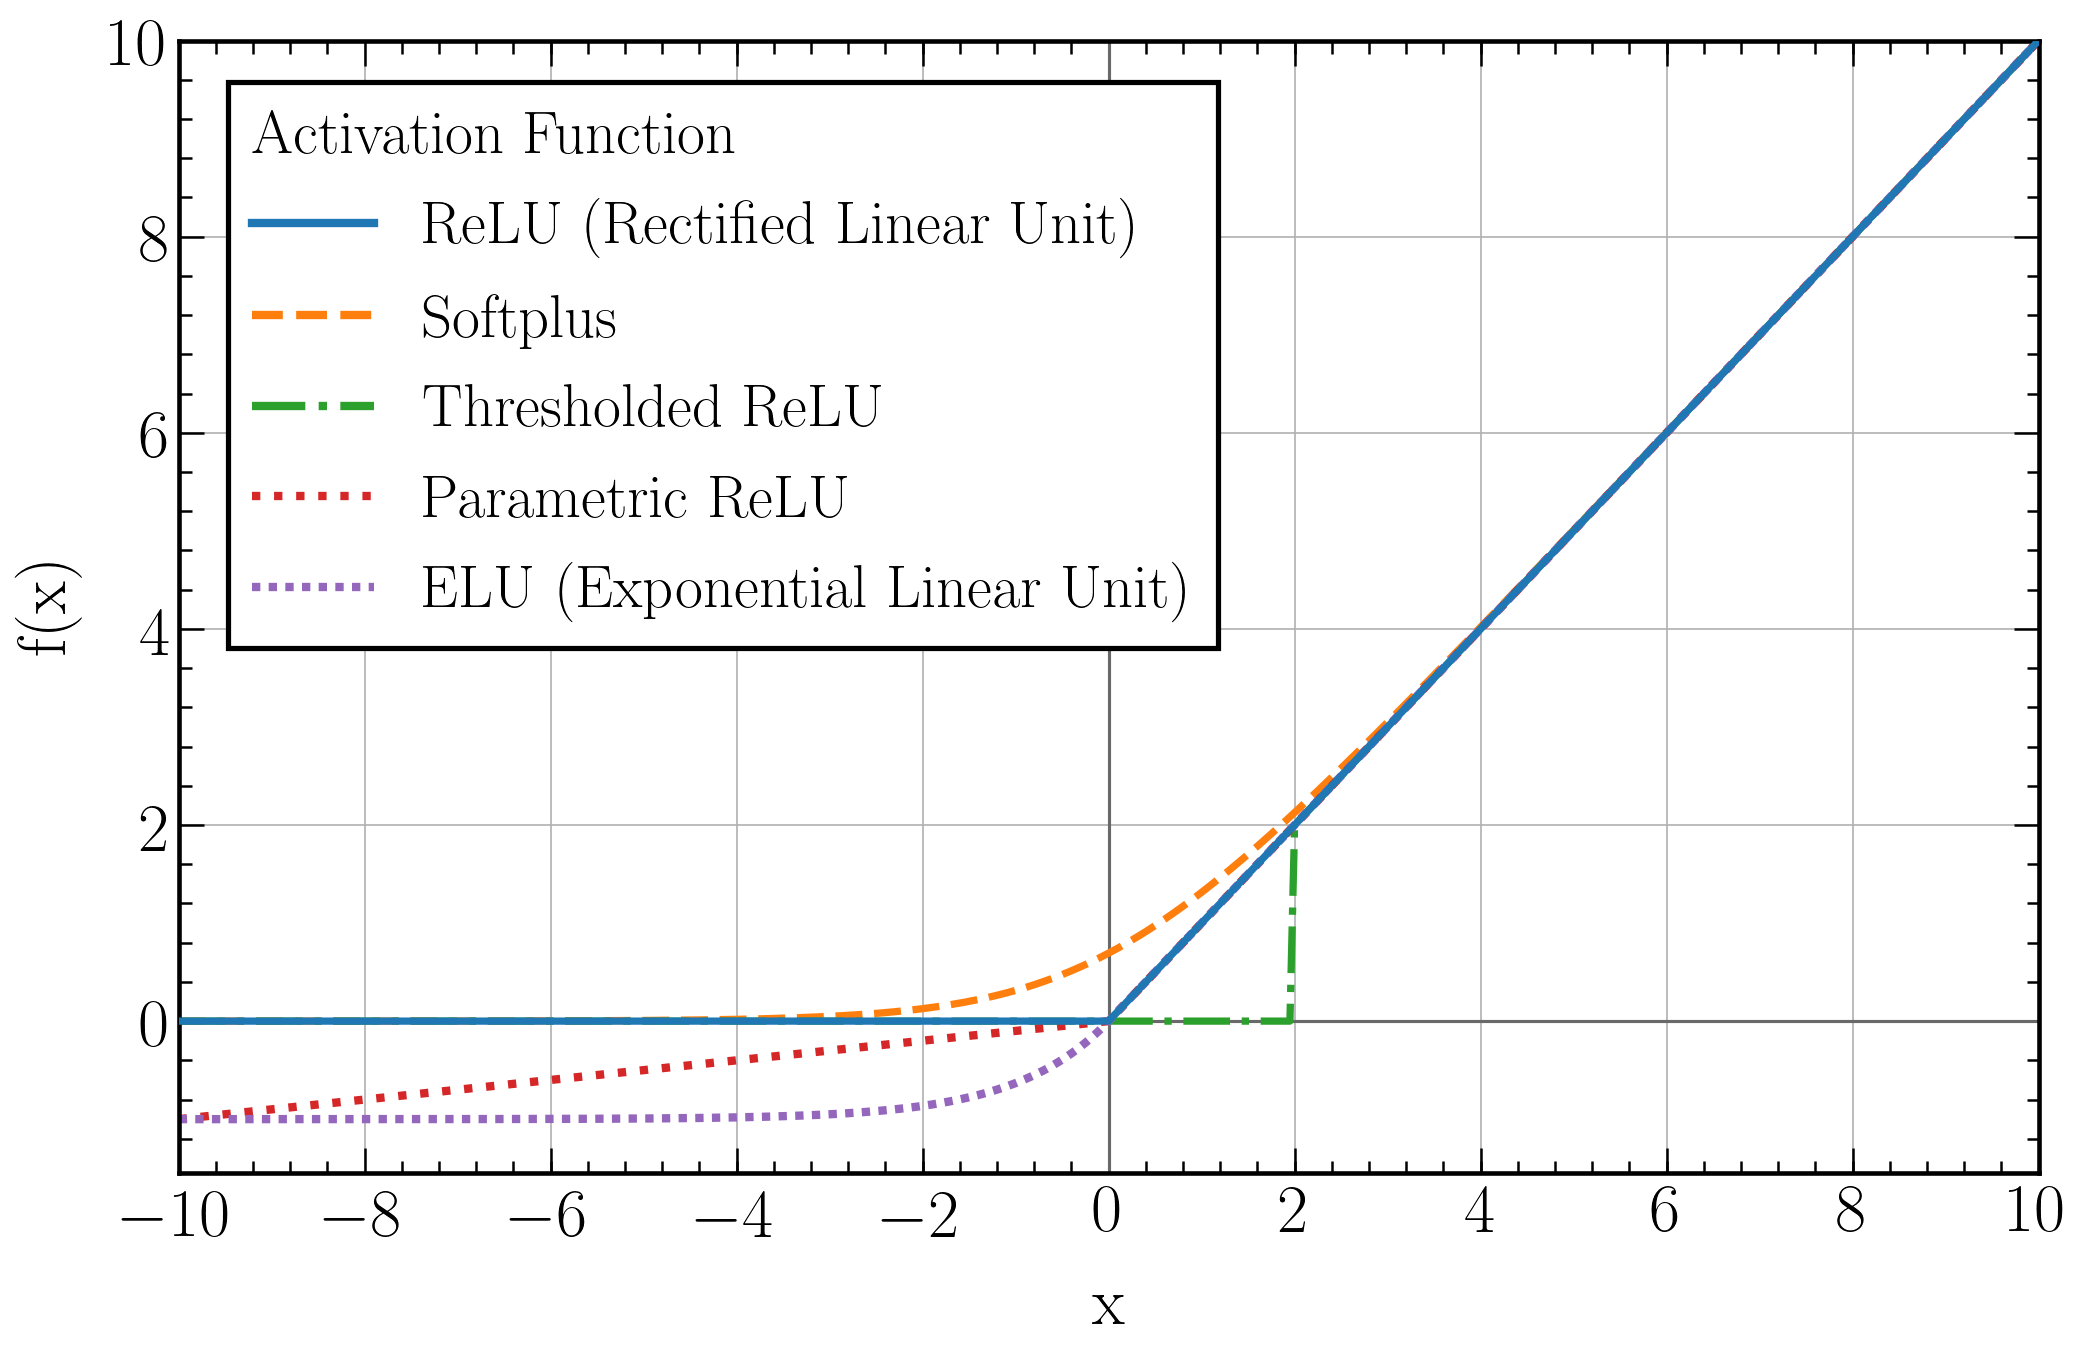

In [21]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, relu(x_list), label = 'ReLU (Rectified Linear Unit)', linewidth =3.5, zorder = 10, linestyle = '-')
plt.plot(x_list, softplus(x_list), label = 'Softplus', linewidth =3.5, linestyle = '--')
plt.plot(x_list, thresholdedrelu(x_list, 2.0), label = 'Thresholded ReLU', linewidth =3.5, linestyle = '-.')
plt.plot(x_list, leaky_relu(x_list, 0.1), label = 'Parametric ReLU', linewidth =4.0, linestyle = ':')
plt.plot(x_list, elu(x_list, 1.0), label = 'ELU (Exponential Linear Unit)', linewidth =4.0, linestyle = (0, (1, 1)))

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_ReLU_like_linestyle.png")
plt.show()

## Sigmoid-like

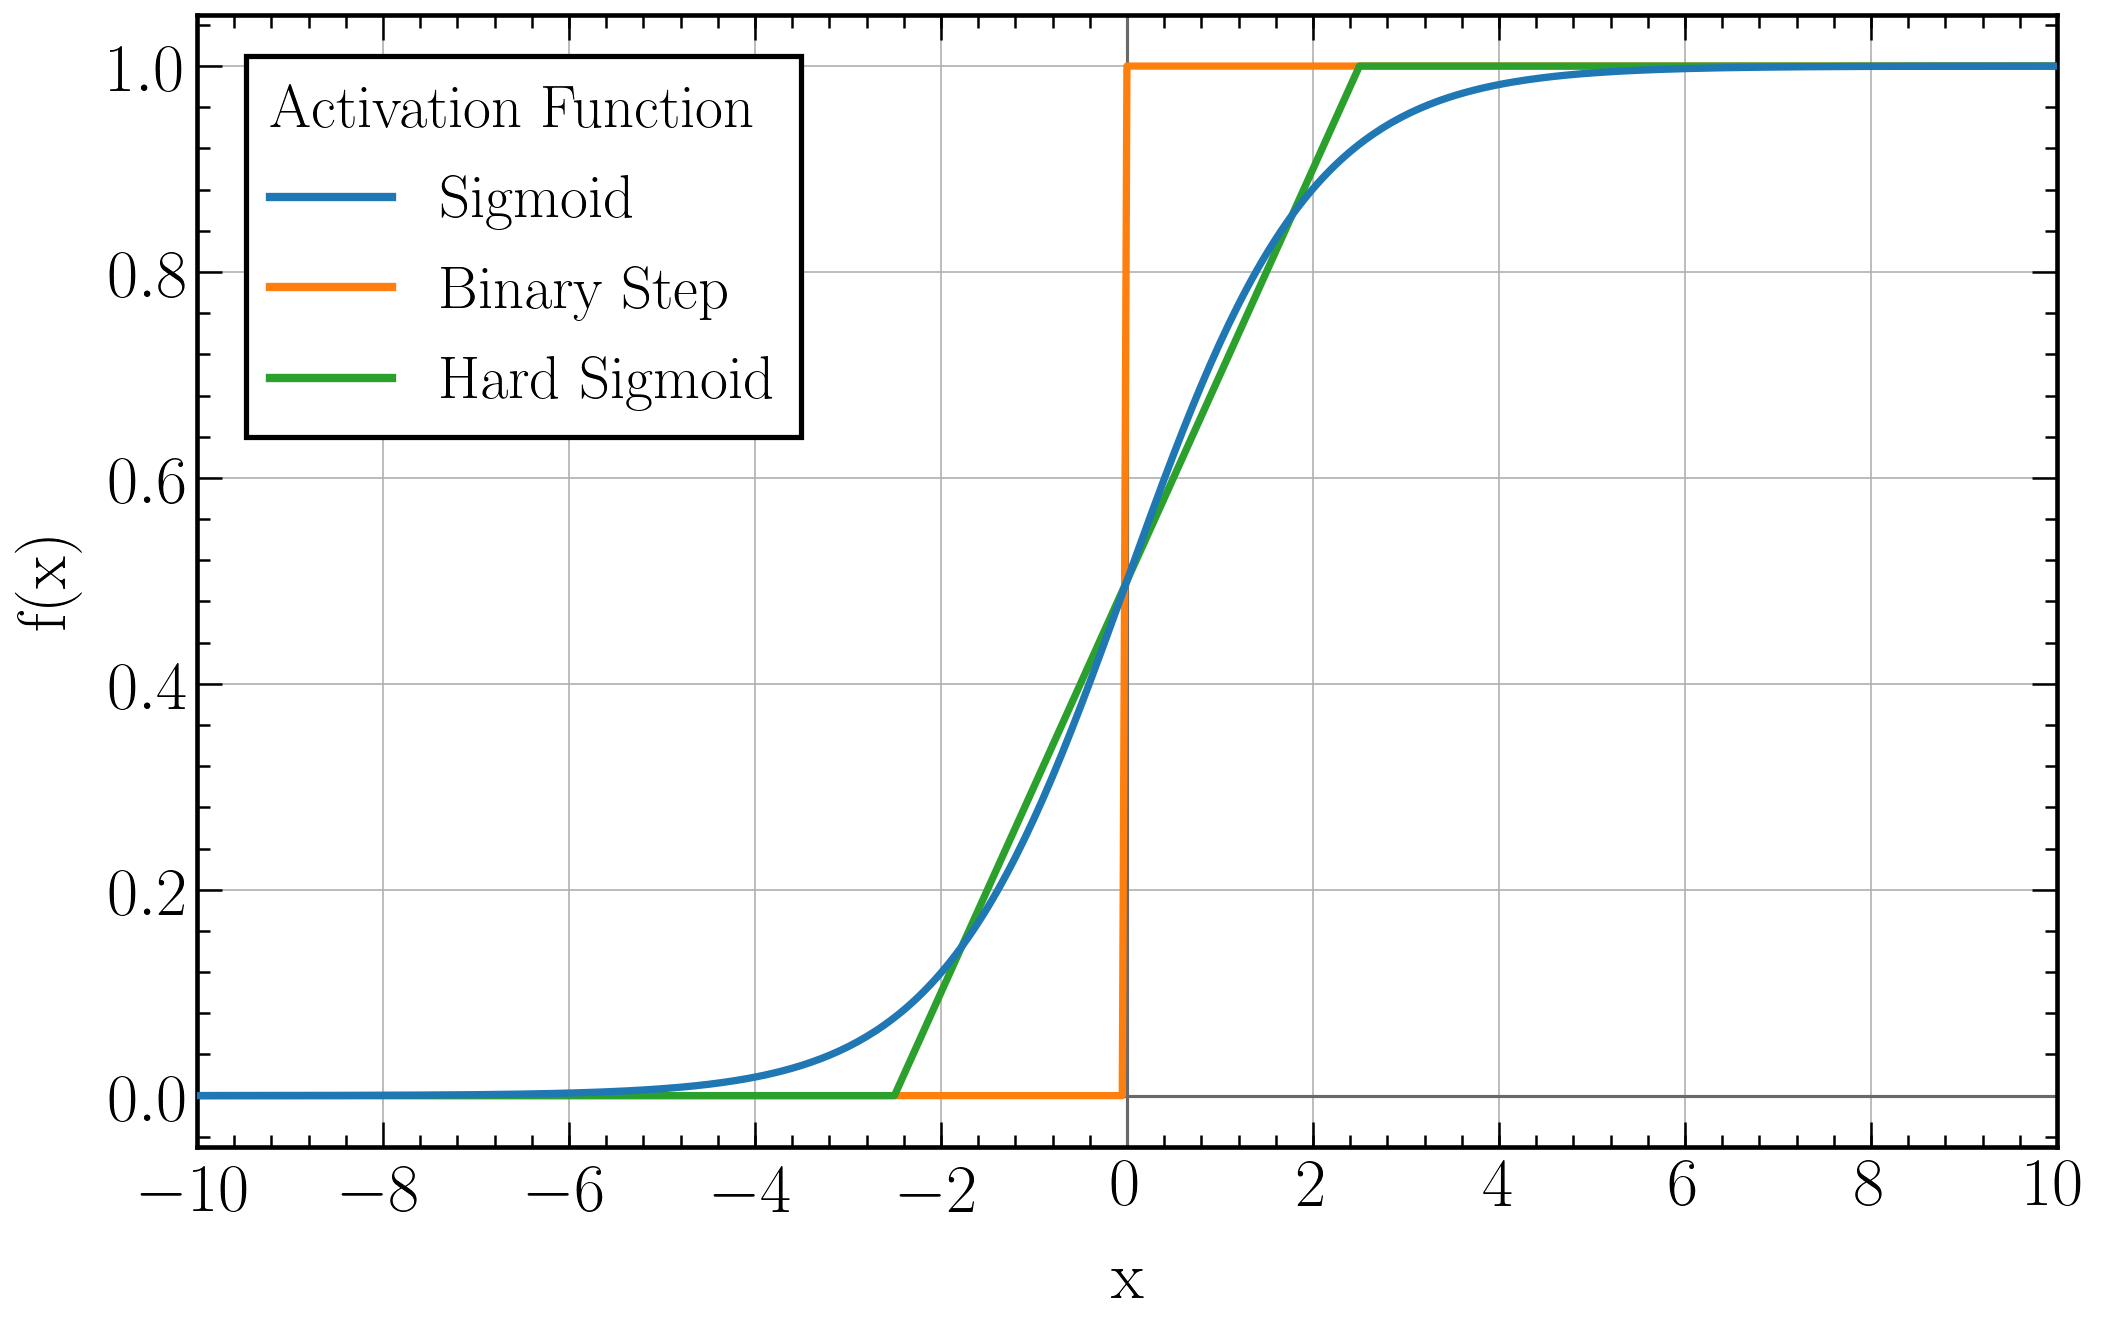

In [22]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, sigmoid(x_list), label = 'Sigmoid', linewidth =3.5, zorder = 10)
plt.plot(x_list, step(x_list), label = 'Binary Step', linewidth =3.5)
plt.plot(x_list, hardsigmoid(x_list), label = 'Hard Sigmoid', linewidth =3.5)


plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Sigmoid_like.png")
plt.show()

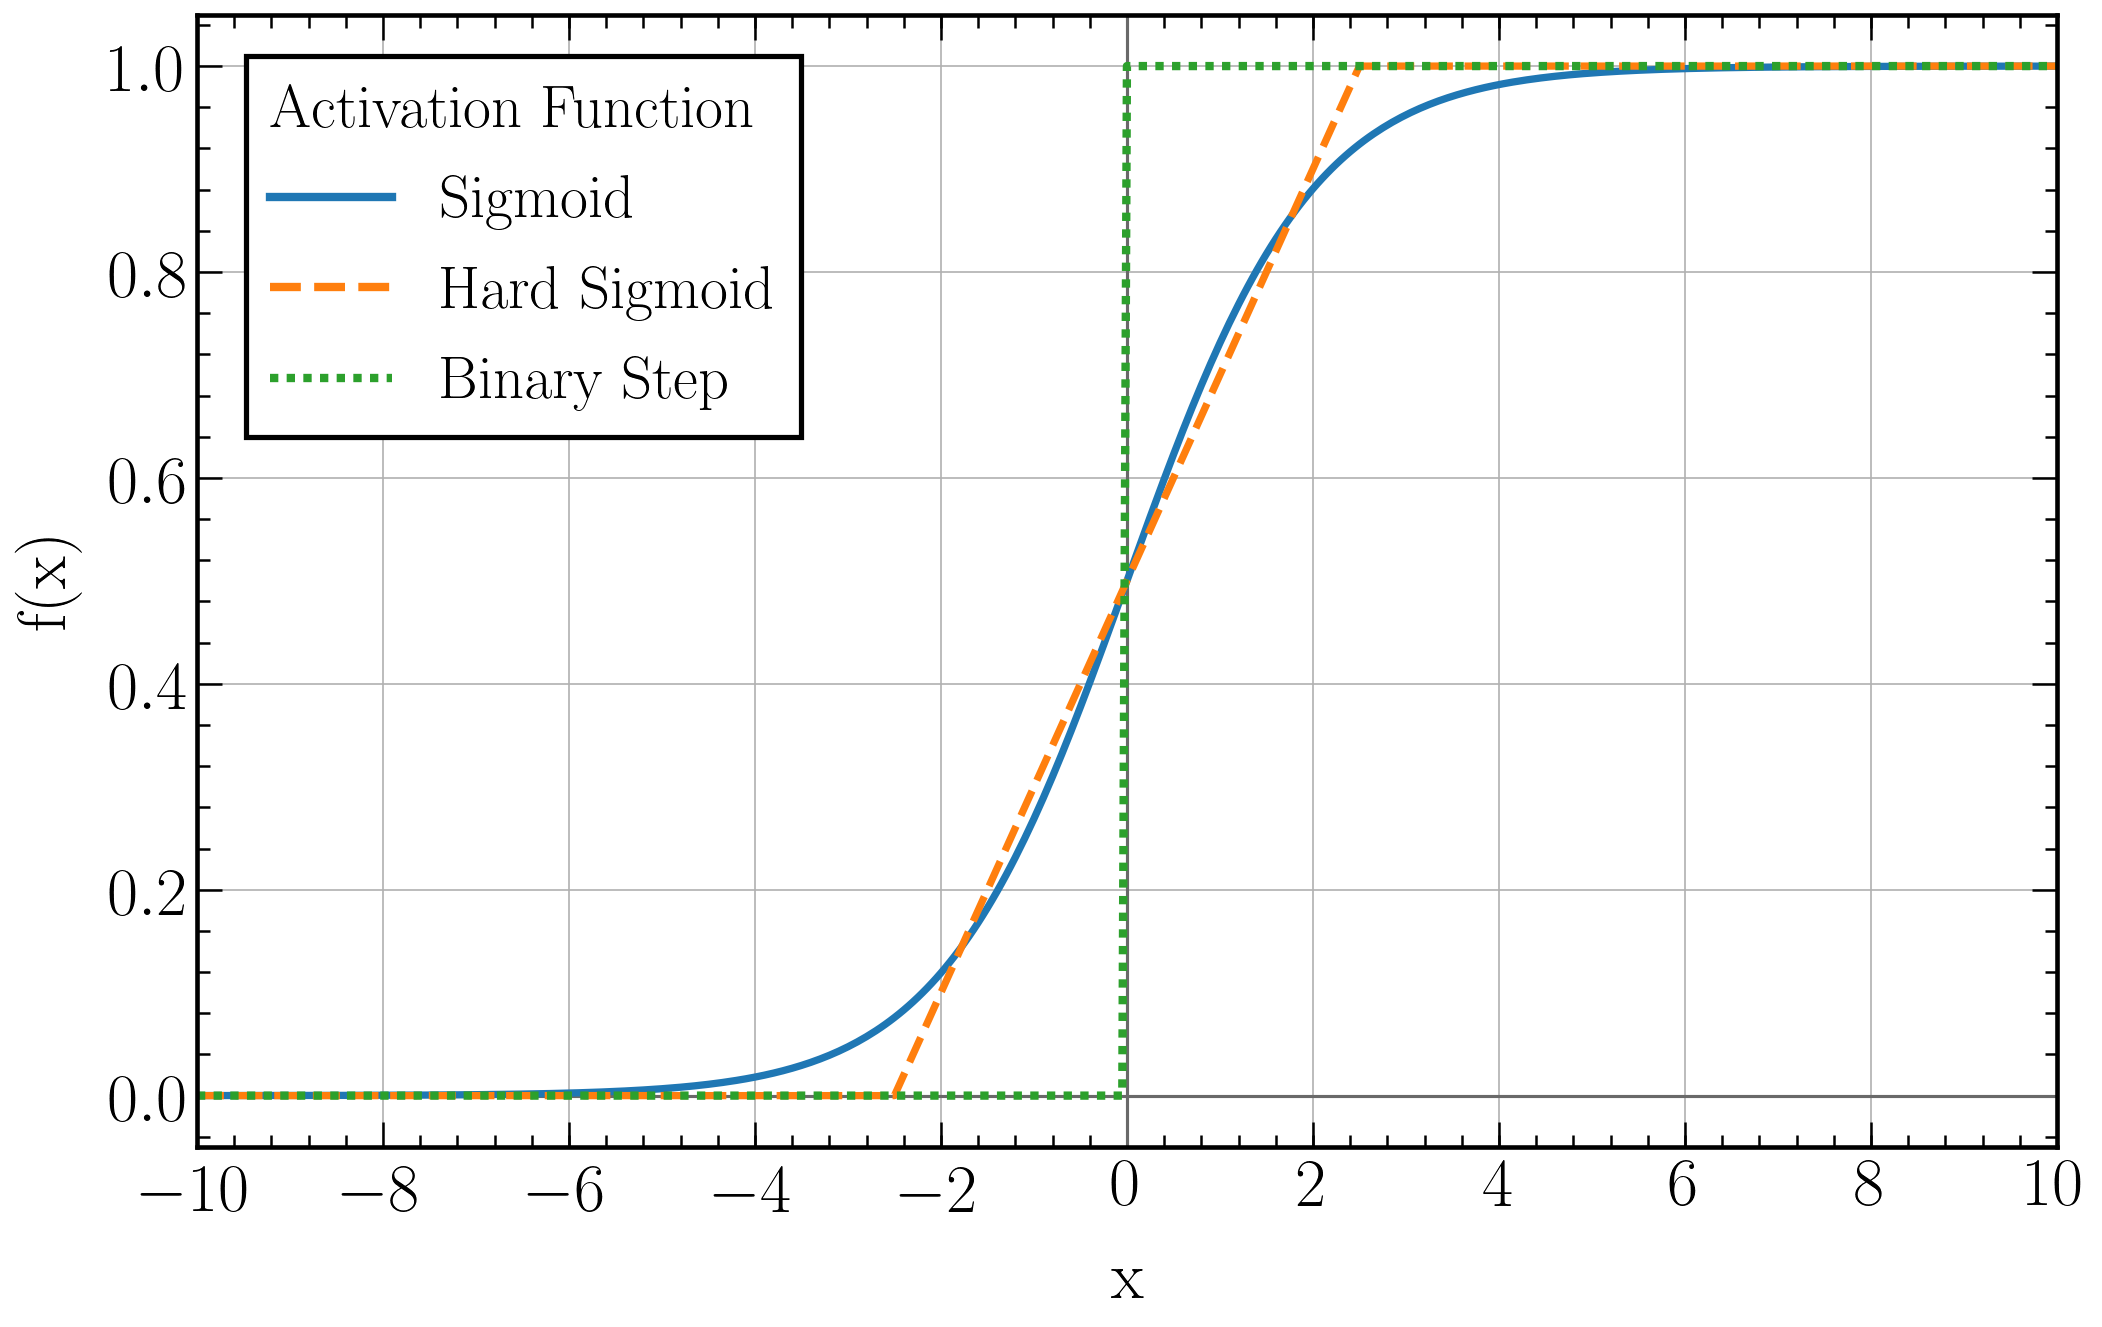

In [23]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, sigmoid(x_list), label = 'Sigmoid', linewidth =3.5, linestyle = '-')

plt.plot(x_list, hardsigmoid(x_list), label = 'Hard Sigmoid', linewidth =3.5, linestyle = '--')
plt.plot(x_list, step(x_list), label = 'Binary Step', linewidth =4.0, linestyle = (0, (1, 1)))

plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Sigmoid_like_linestyle.png")
plt.show()

## Tanh-like

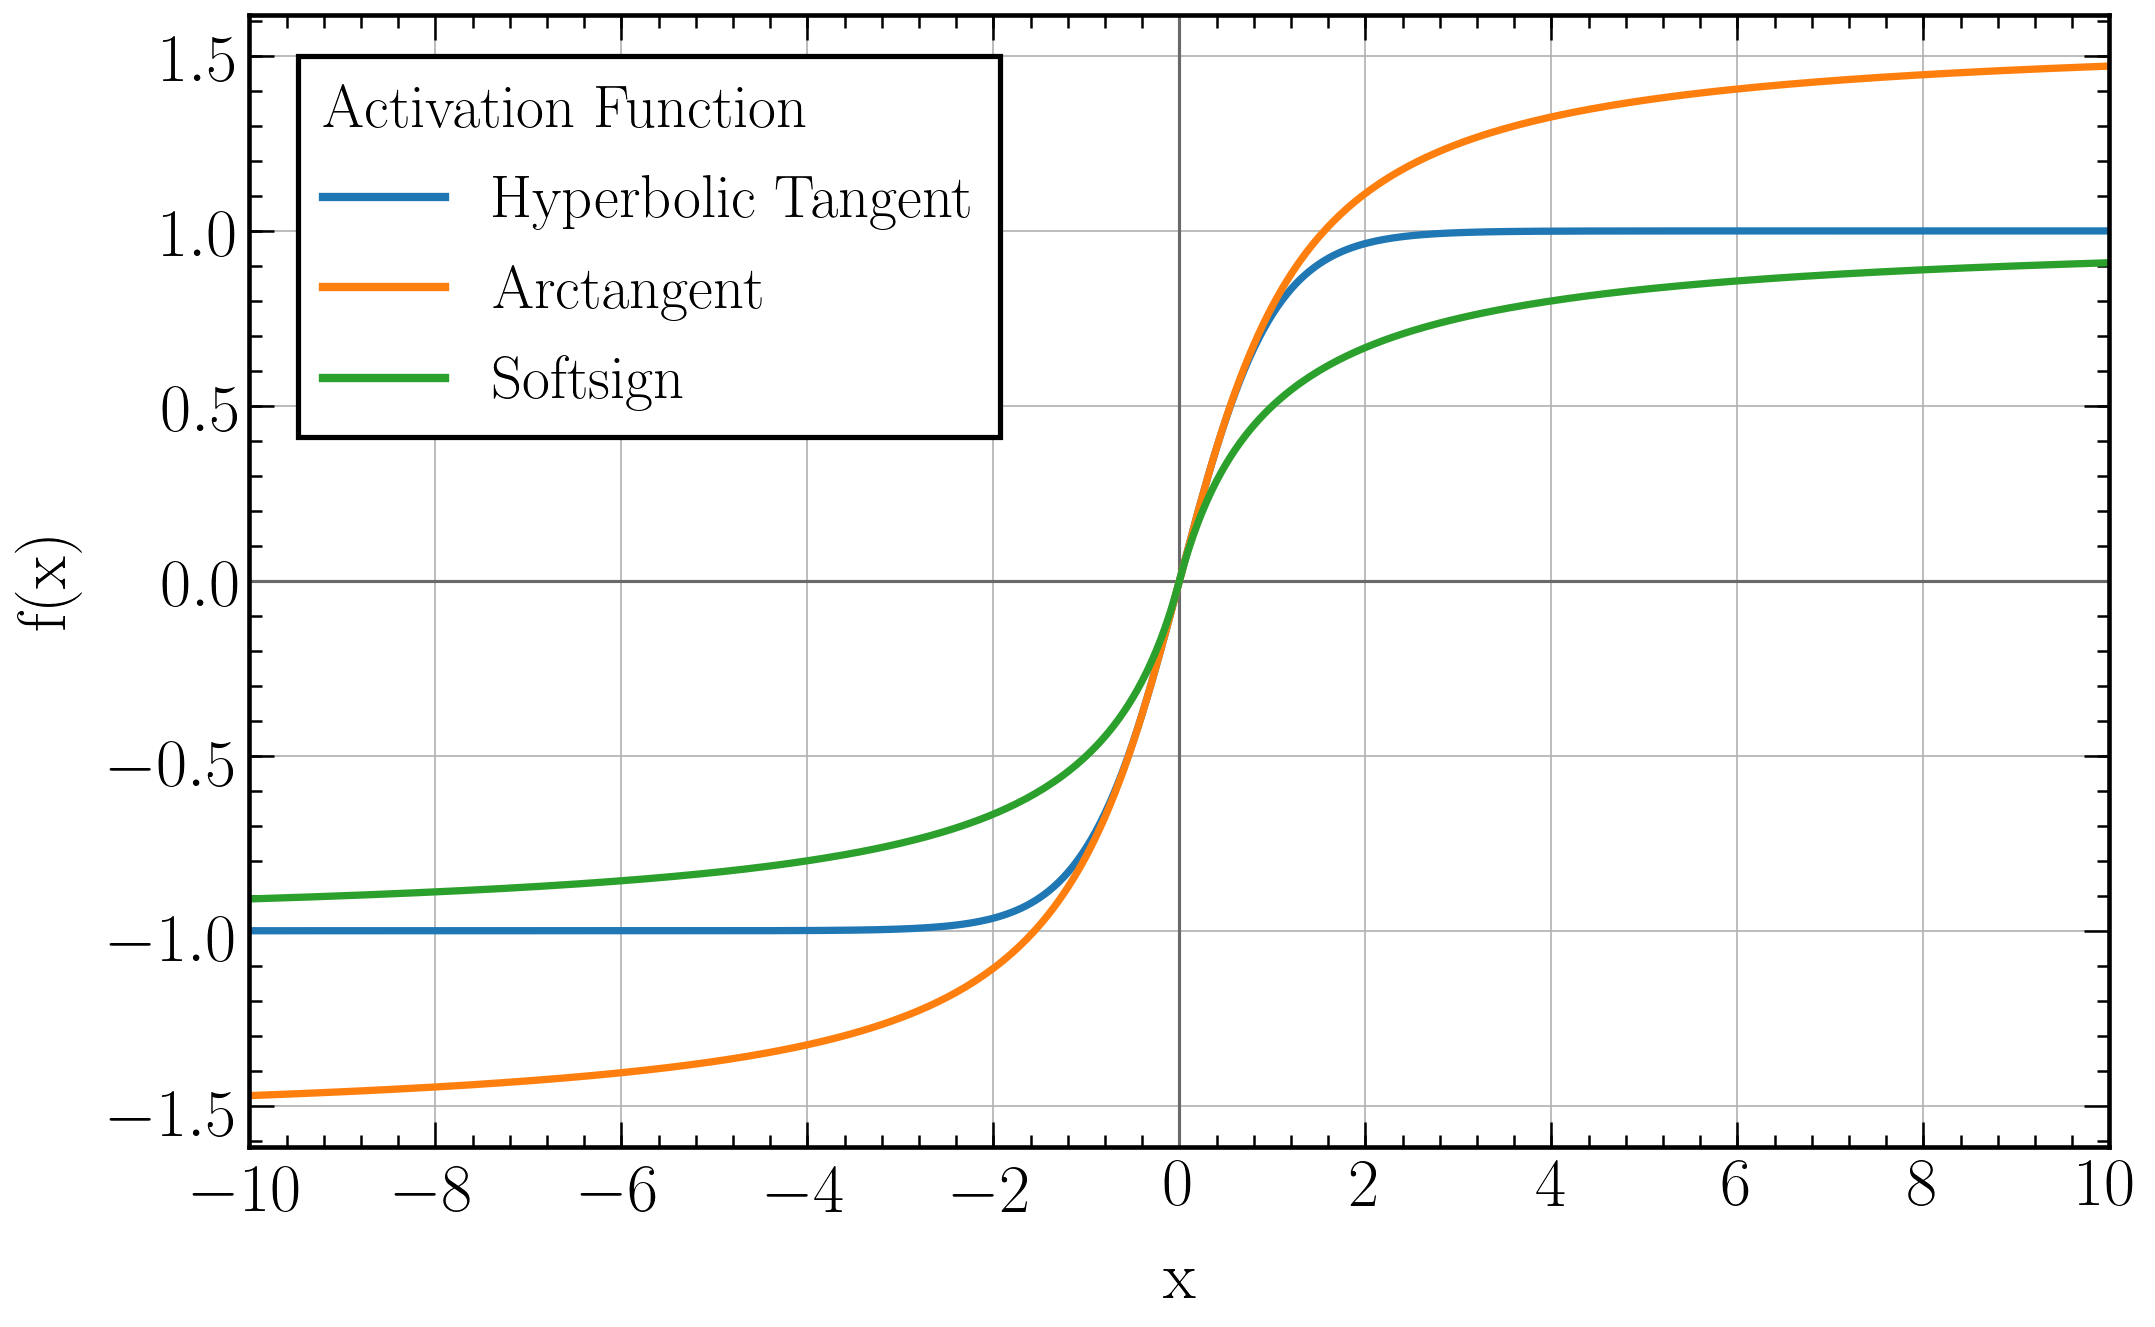

In [24]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, tanh(x_list), label = 'Hyperbolic Tangent', linewidth =3.5)
plt.plot(x_list, arctan(x_list), label = 'Arctangent', linewidth =3.5)
plt.plot(x_list, softsign(x_list), label = 'Softsign', linewidth =3.5)


plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Tanh_like.png")
plt.show()

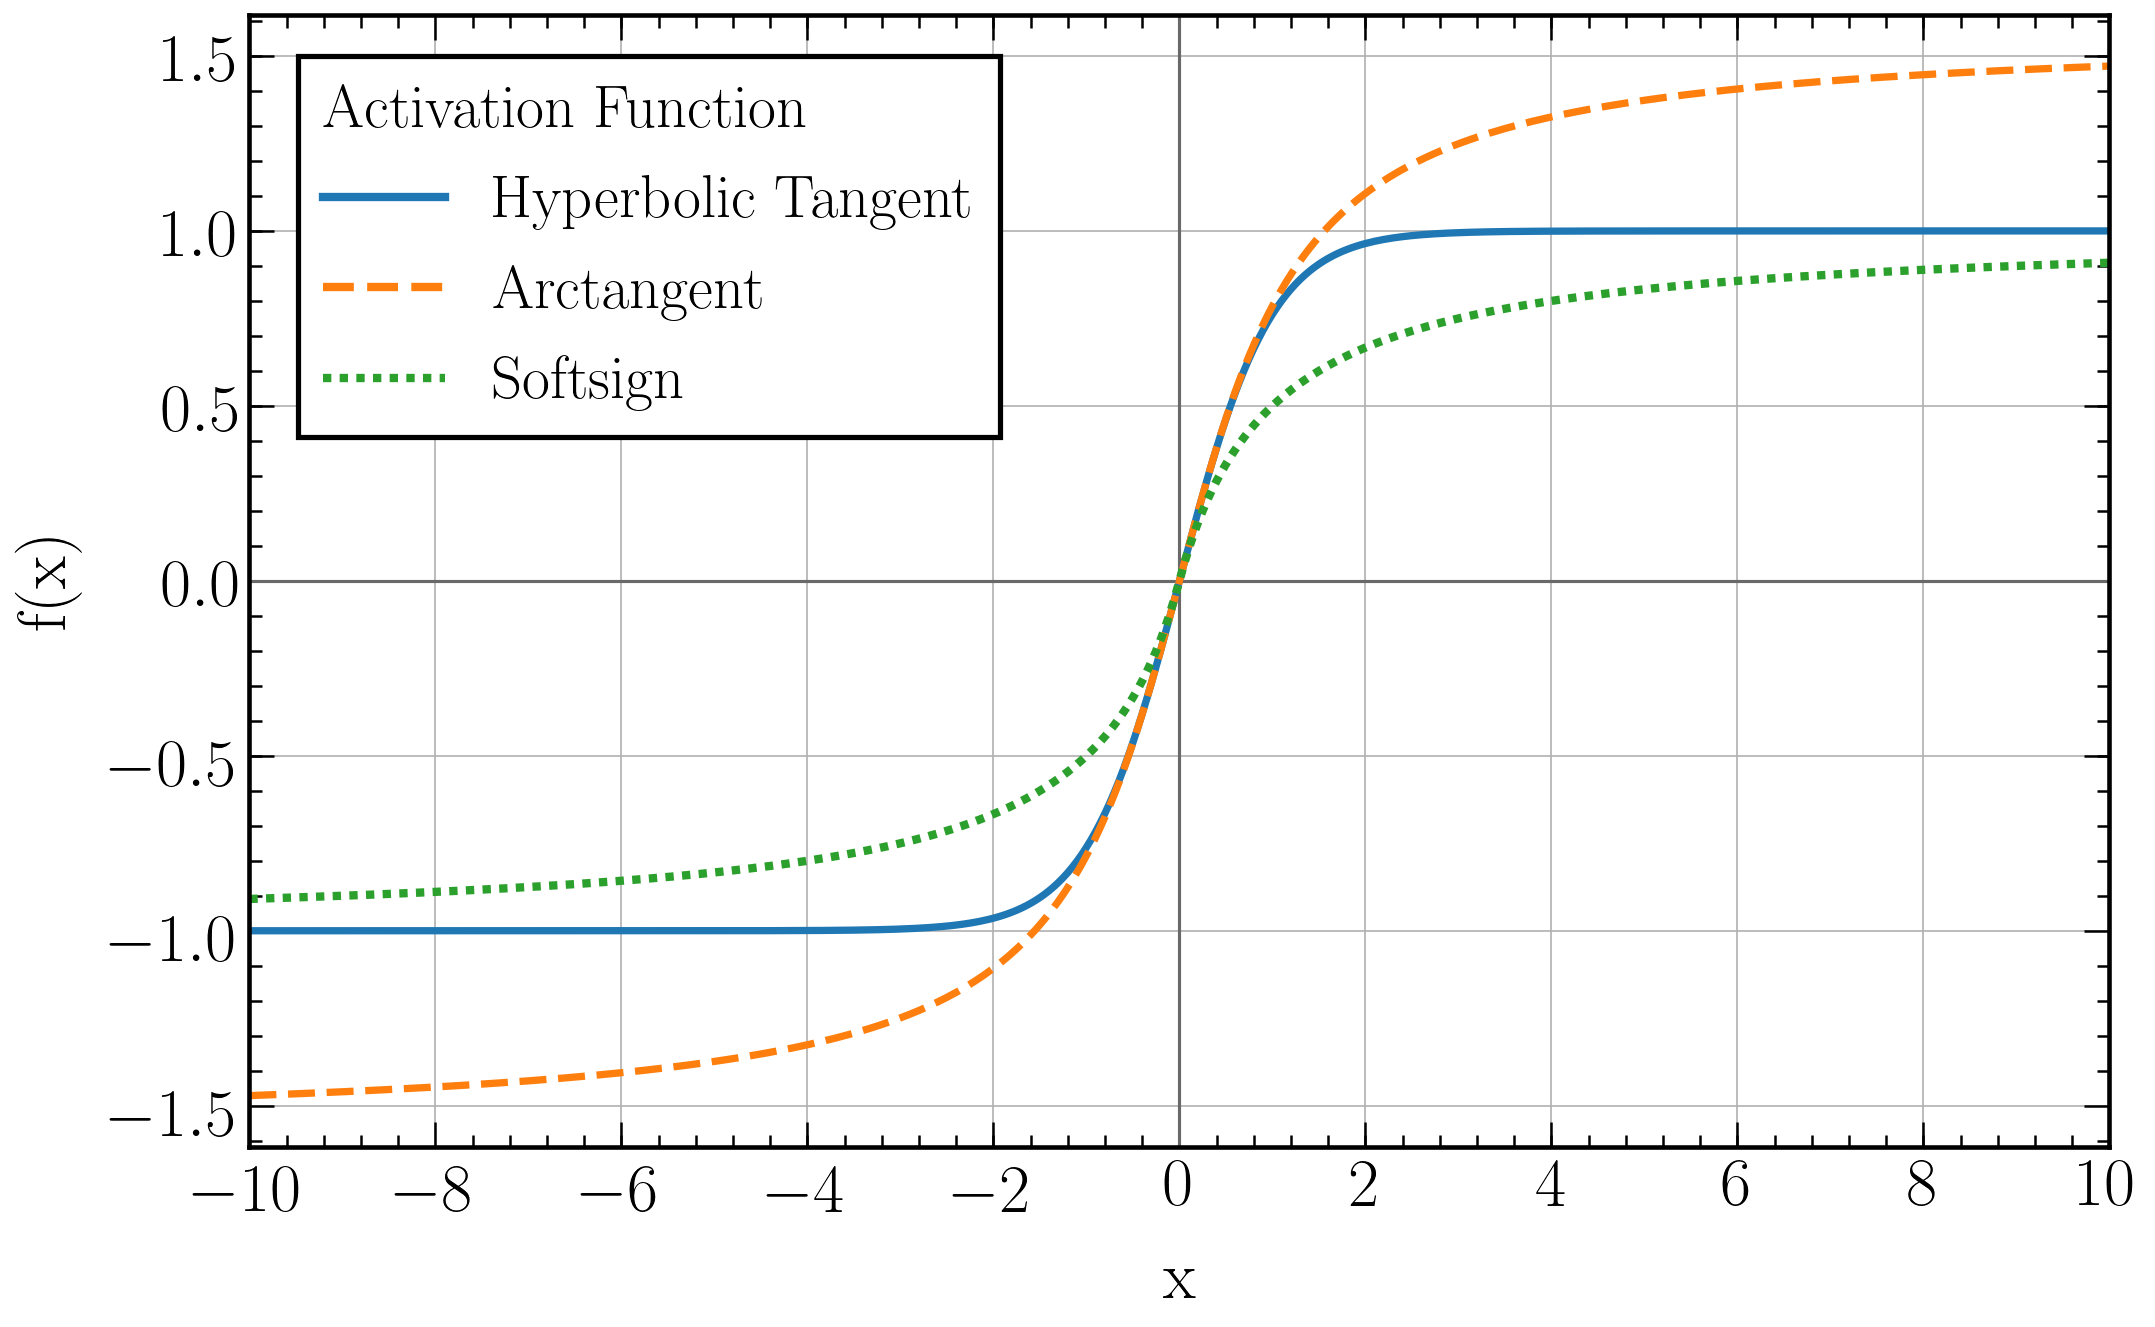

In [25]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.axhline(y=0, color = 'dimgray')
plt.axvline(x=0, color = 'dimgray')

plt.plot(x_list, tanh(x_list), label = 'Hyperbolic Tangent', linewidth =3.5, linestyle = '-')
plt.plot(x_list, arctan(x_list), label = 'Arctangent', linewidth =3.5, linestyle = '--')
plt.plot(x_list, softsign(x_list), label = 'Softsign', linewidth =4.0, linestyle = (0, (1, 1)))


plt.xlabel('x', fontsize = label_size, labelpad = label_pad)
plt.ylabel('f(x)', fontsize = label_size, labelpad = label_pad)
#plt.title('Title', fontsize = title_size, pad = title_pad)


# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), title="Activation Function", fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False, framealpha=1.0)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
plt.xlim(-10,10)
#plt.ylim(top=10)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Activation_Tanh_like_linestyle.png")
plt.show()